In [1]:
from pycigar.utils.input_parser import input_parser

In [2]:
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'

start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=False, percentage_hack=0.45)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['simulation_config']['custom_configs']['solution_control_mode'] = 2
del sim_params['attack_randomization']

from pycigar.utils.registry import register_devcon
from pycigar.devices.battery_storage_device import BatteryStorageDevice
from pycigar.controllers.battery_storage_controller import BatteryStorageController
register_devcon('battery_storage_device', BatteryStorageDevice)
register_devcon('battery_storage_controller', BatteryStorageController)

battery_device = {
    'name': 'battery_s701a',
    'device': 'battery_storage_device',
    'custom_device_configs': {
        'default_control_setting': 'auto_minmax_cycle'
    },
    'controller': 'battery_storage_controller',
    'custom_controller_configs': {
        'default_control_setting': 'auto_minmax_cycle'
    }
}
sim_params['scenario_config']['nodes'][0]['devices'].append(battery_device)


In [3]:
from pycigar.utils.registry import register_devcon
from pycigar.controllers.adaptive_unbalanced_fixed_controller import AdaptiveUnbalancedFixedController
register_devcon('adaptive_unbalanced_fixed_controller', AdaptiveUnbalancedFixedController)


'adaptive_unbalanced_fixed_controller'

In [4]:
from pycigar.envs import MultiAttackCentralControlPhaseSpecificPVInverterEnv

env = MultiAttackCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)

In [5]:
env.reset()
done = False
total_r = 0
while not done:
    _, r, done, _ = env.step([10, 10, 10])
    total_r += r 

In [6]:
from pycigar.utils.logging import logger
Logger = logger()

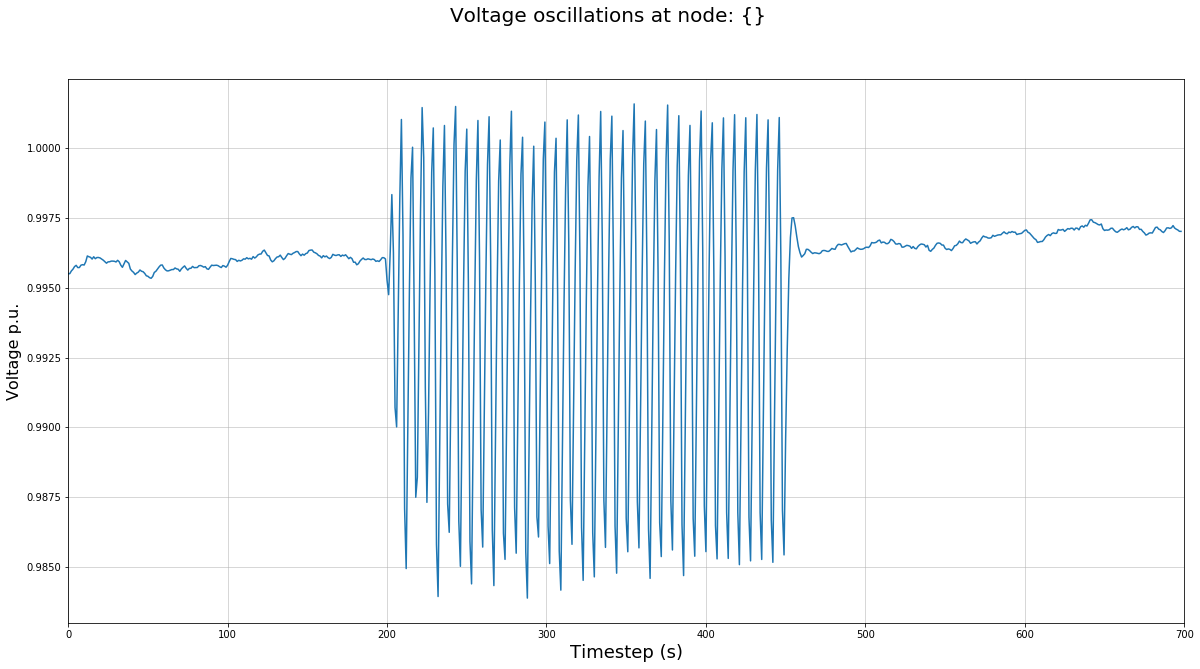

In [7]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
node_id = 's701a'
f.suptitle('Voltage oscillations at node: {}', fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.plot(Logger.log_dict[node_id]['voltage'])
plt.show()

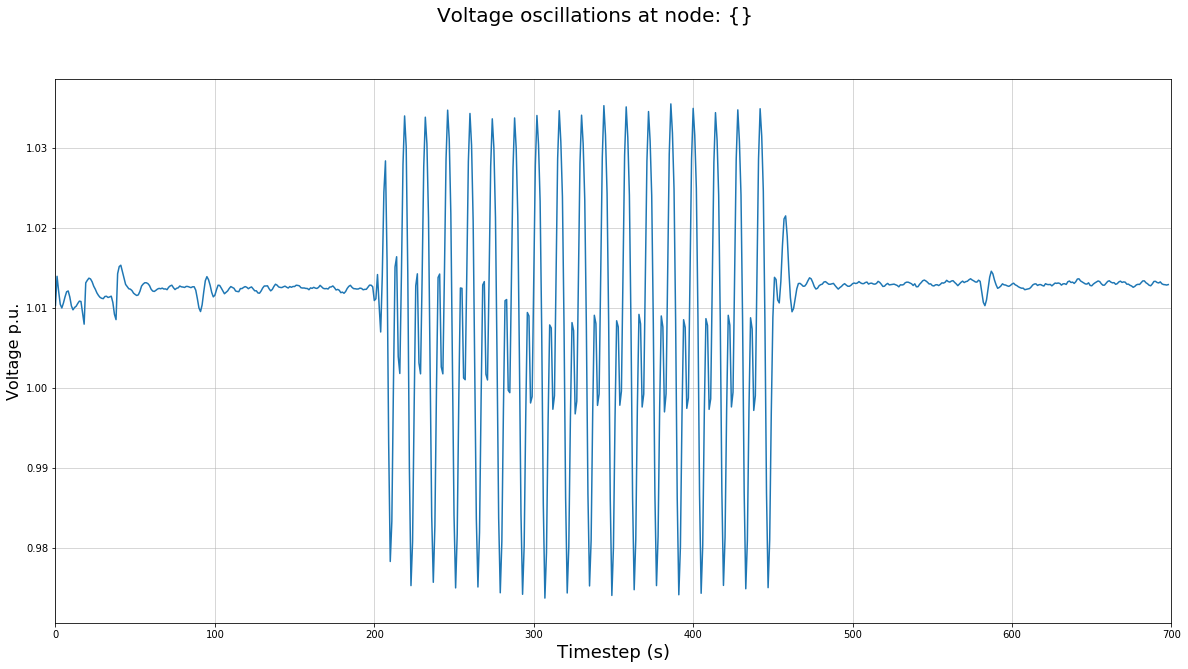

In [7]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(figsize=(20, 10))

ax.grid(linestyle='-', linewidth=0.5)
ax.set_xlim([0, 700])
node_id = 's728'
f.suptitle('Voltage oscillations at node: {}', fontsize=20)
plt.xlabel('Timestep (s)', fontsize=18)
plt.ylabel('Voltage p.u.', fontsize=16)
ax.plot(Logger.log_dict[node_id]['voltage'])
plt.show()

from pycigar.utils.output import plot_new
log_dict = Logger.log_dict
custom_metrics = Logger.custom_metrics
plot_new(log_dict, custom_metrics, epoch='', unbalance=True, multiagent=False)

from pycigar.utils.output import plot_new
log_dict = Logger.log_dict
custom_metrics = Logger.custom_metrics
plot_new(log_dict, custom_metrics, epoch='', unbalance=True, multiagent=False)

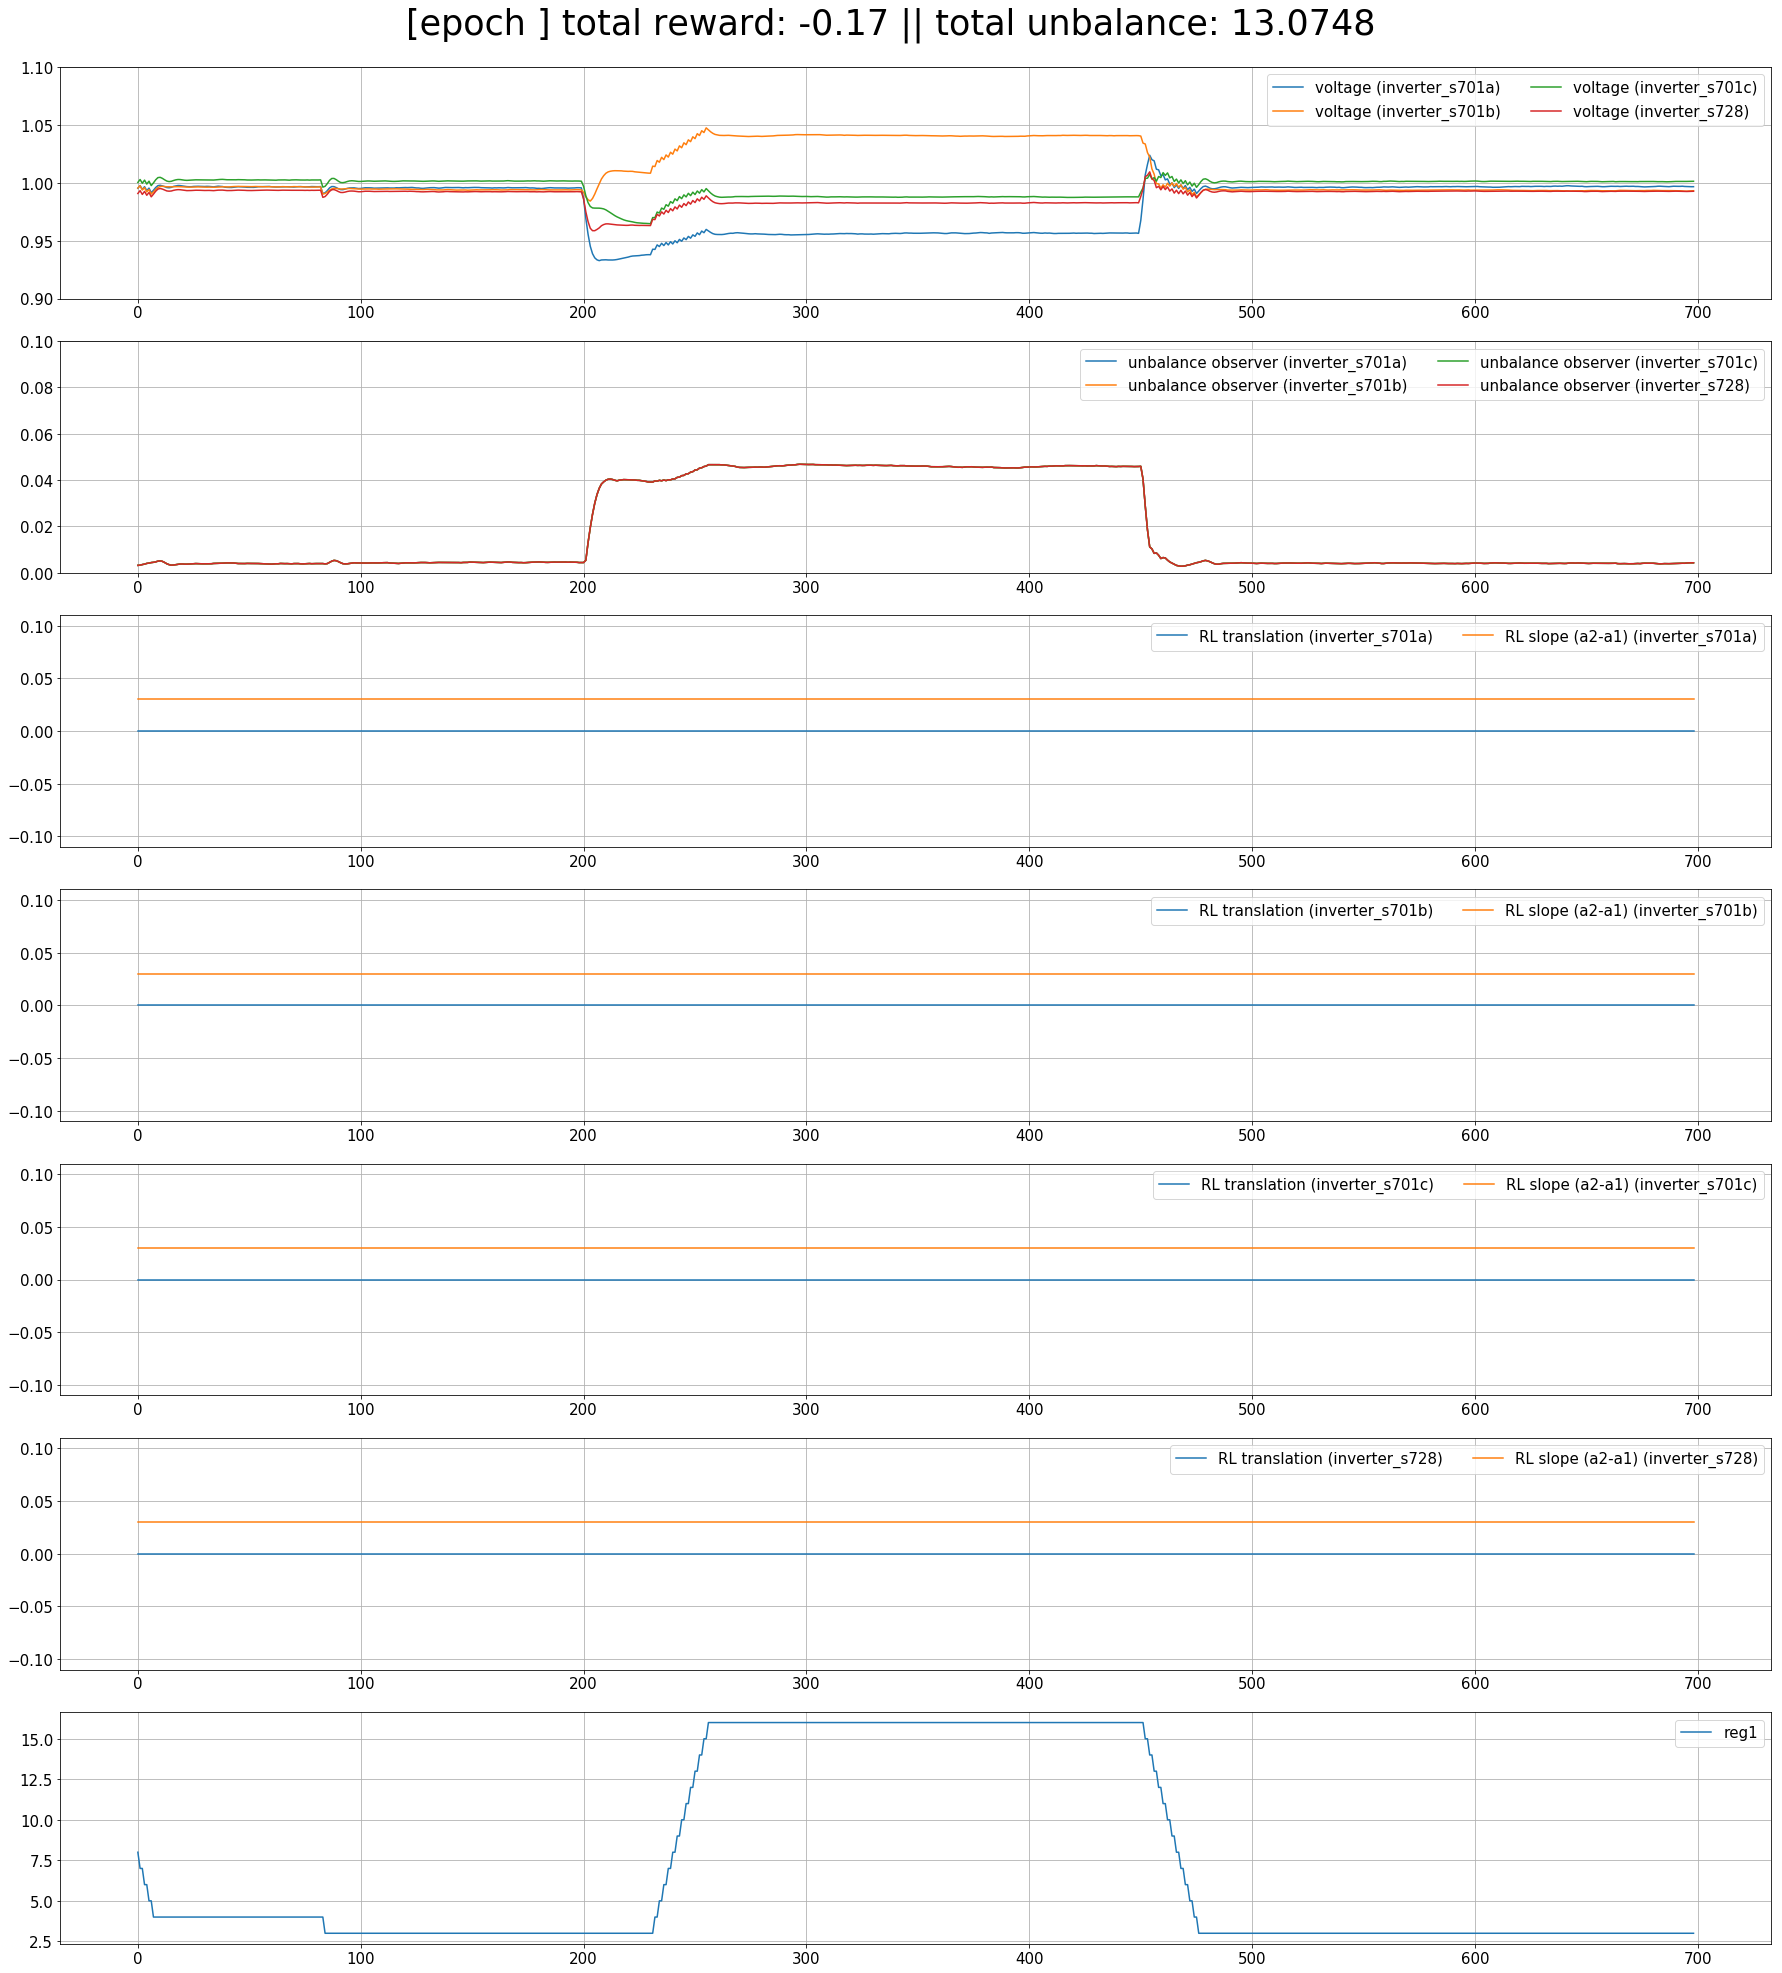

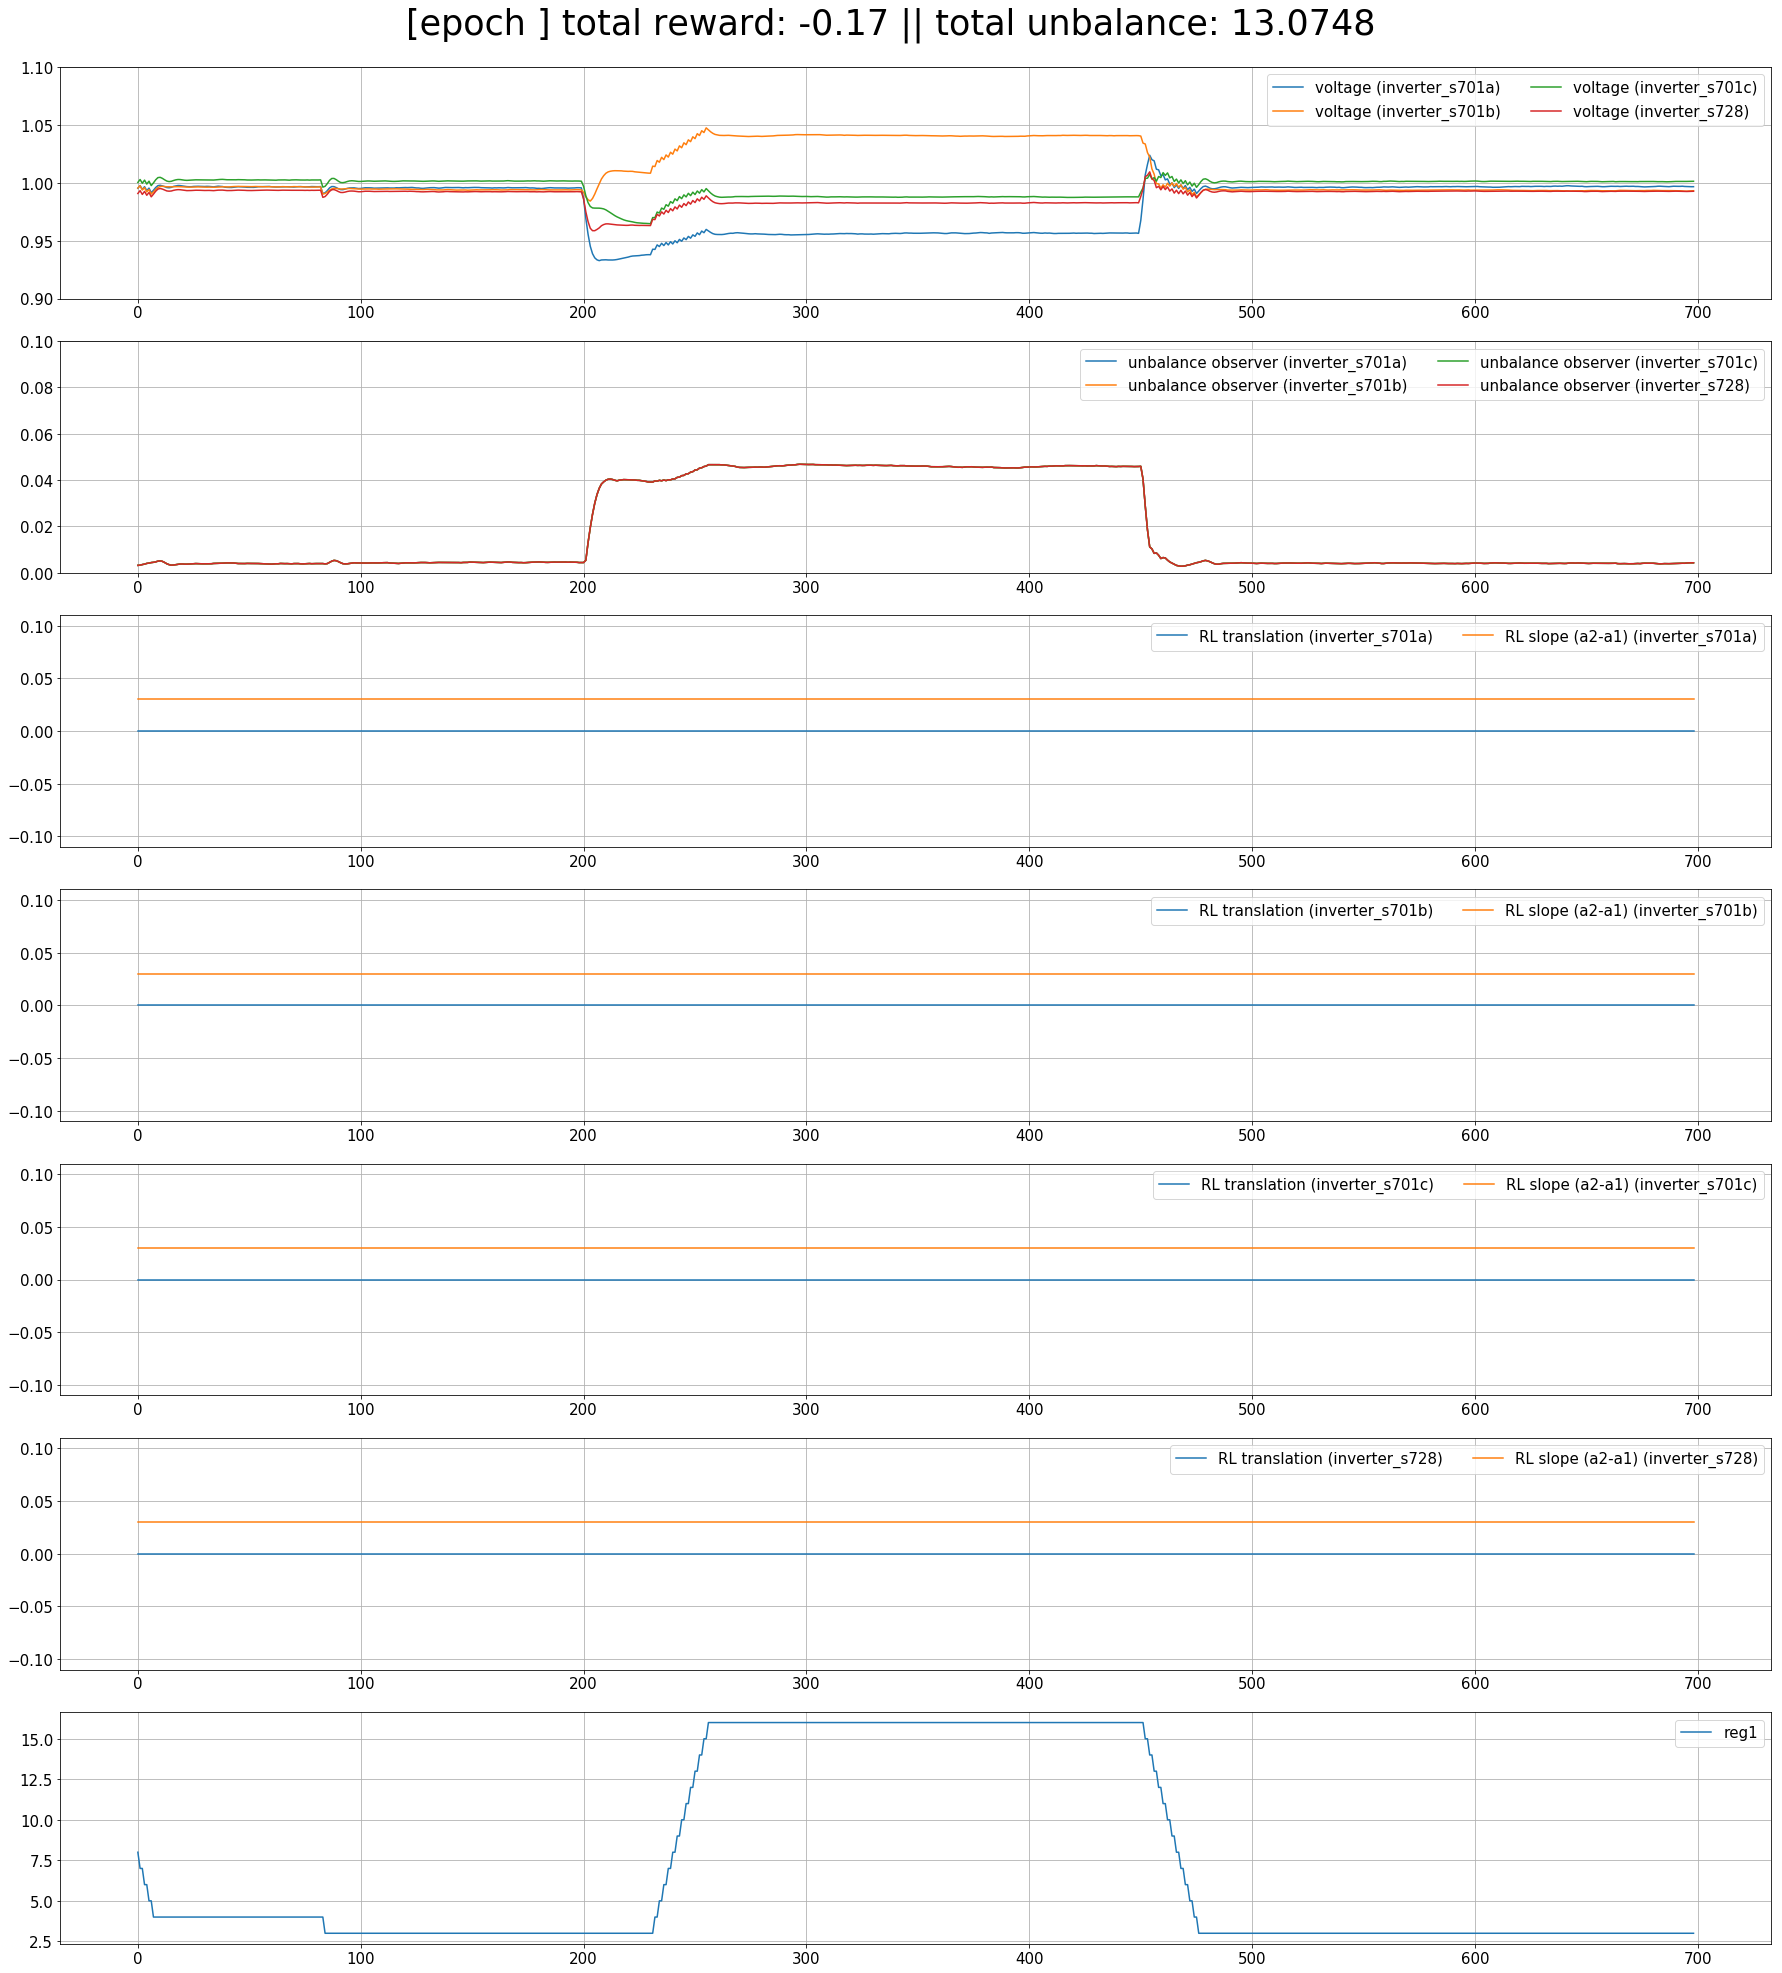

In [7]:
from pycigar.utils.output import plot_new

plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=True)

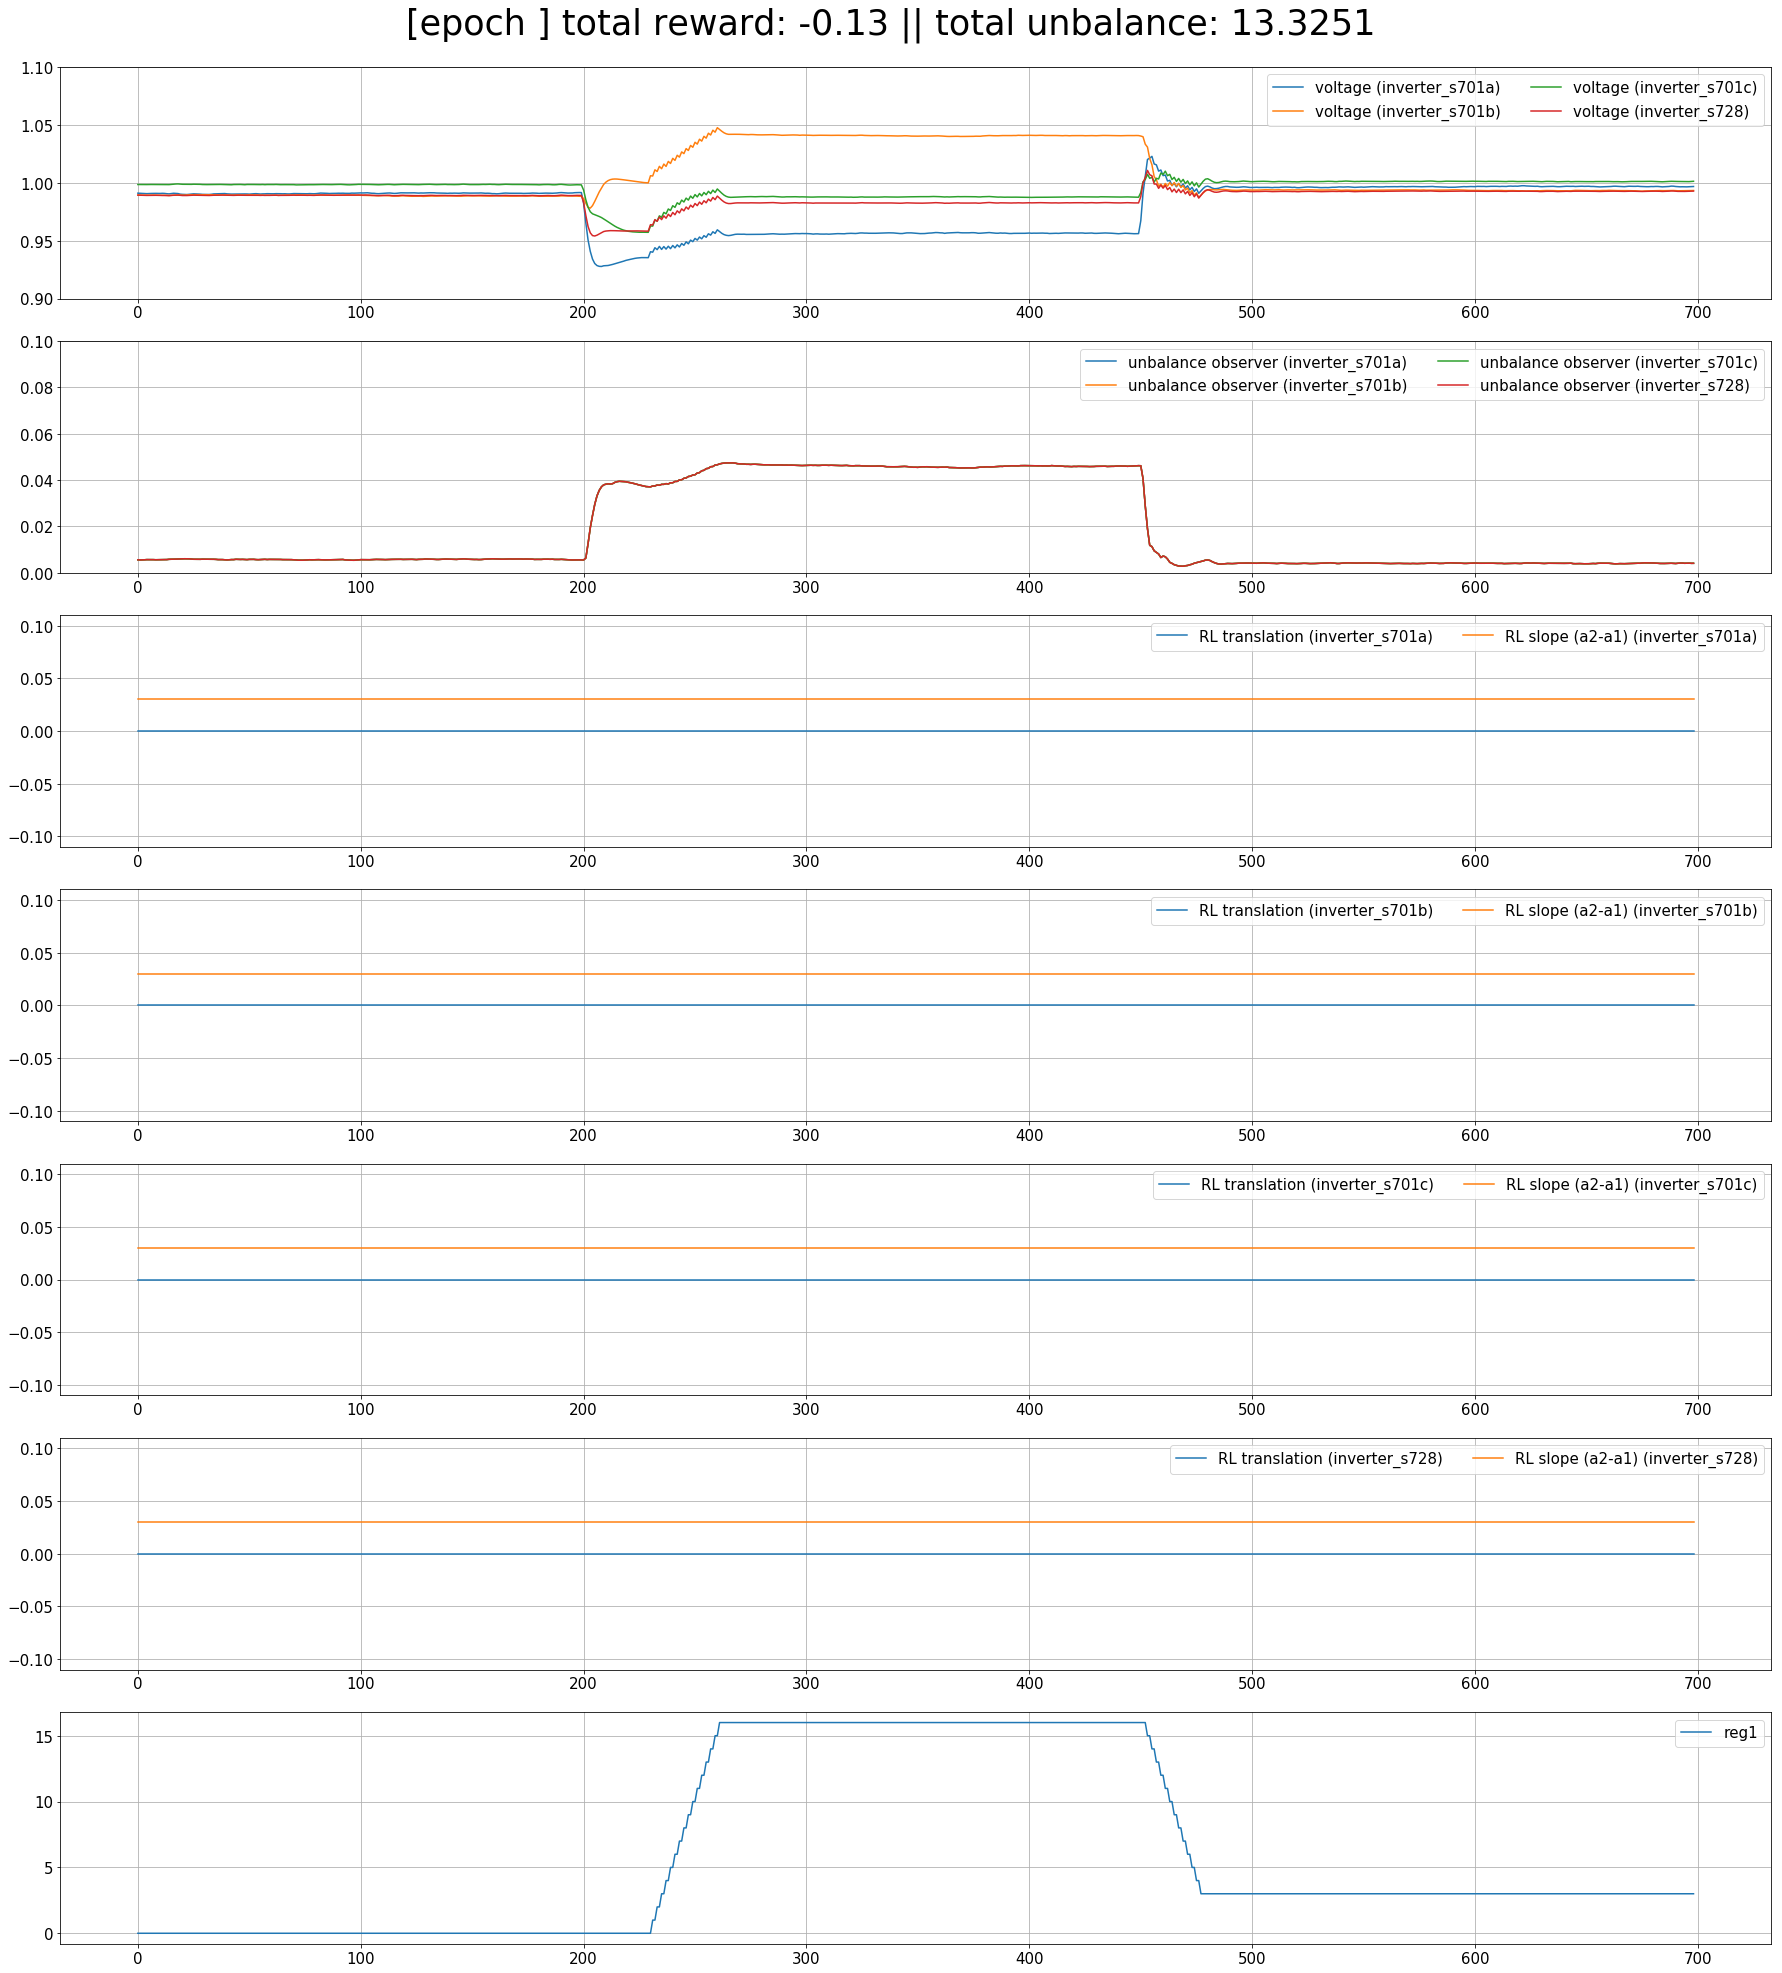

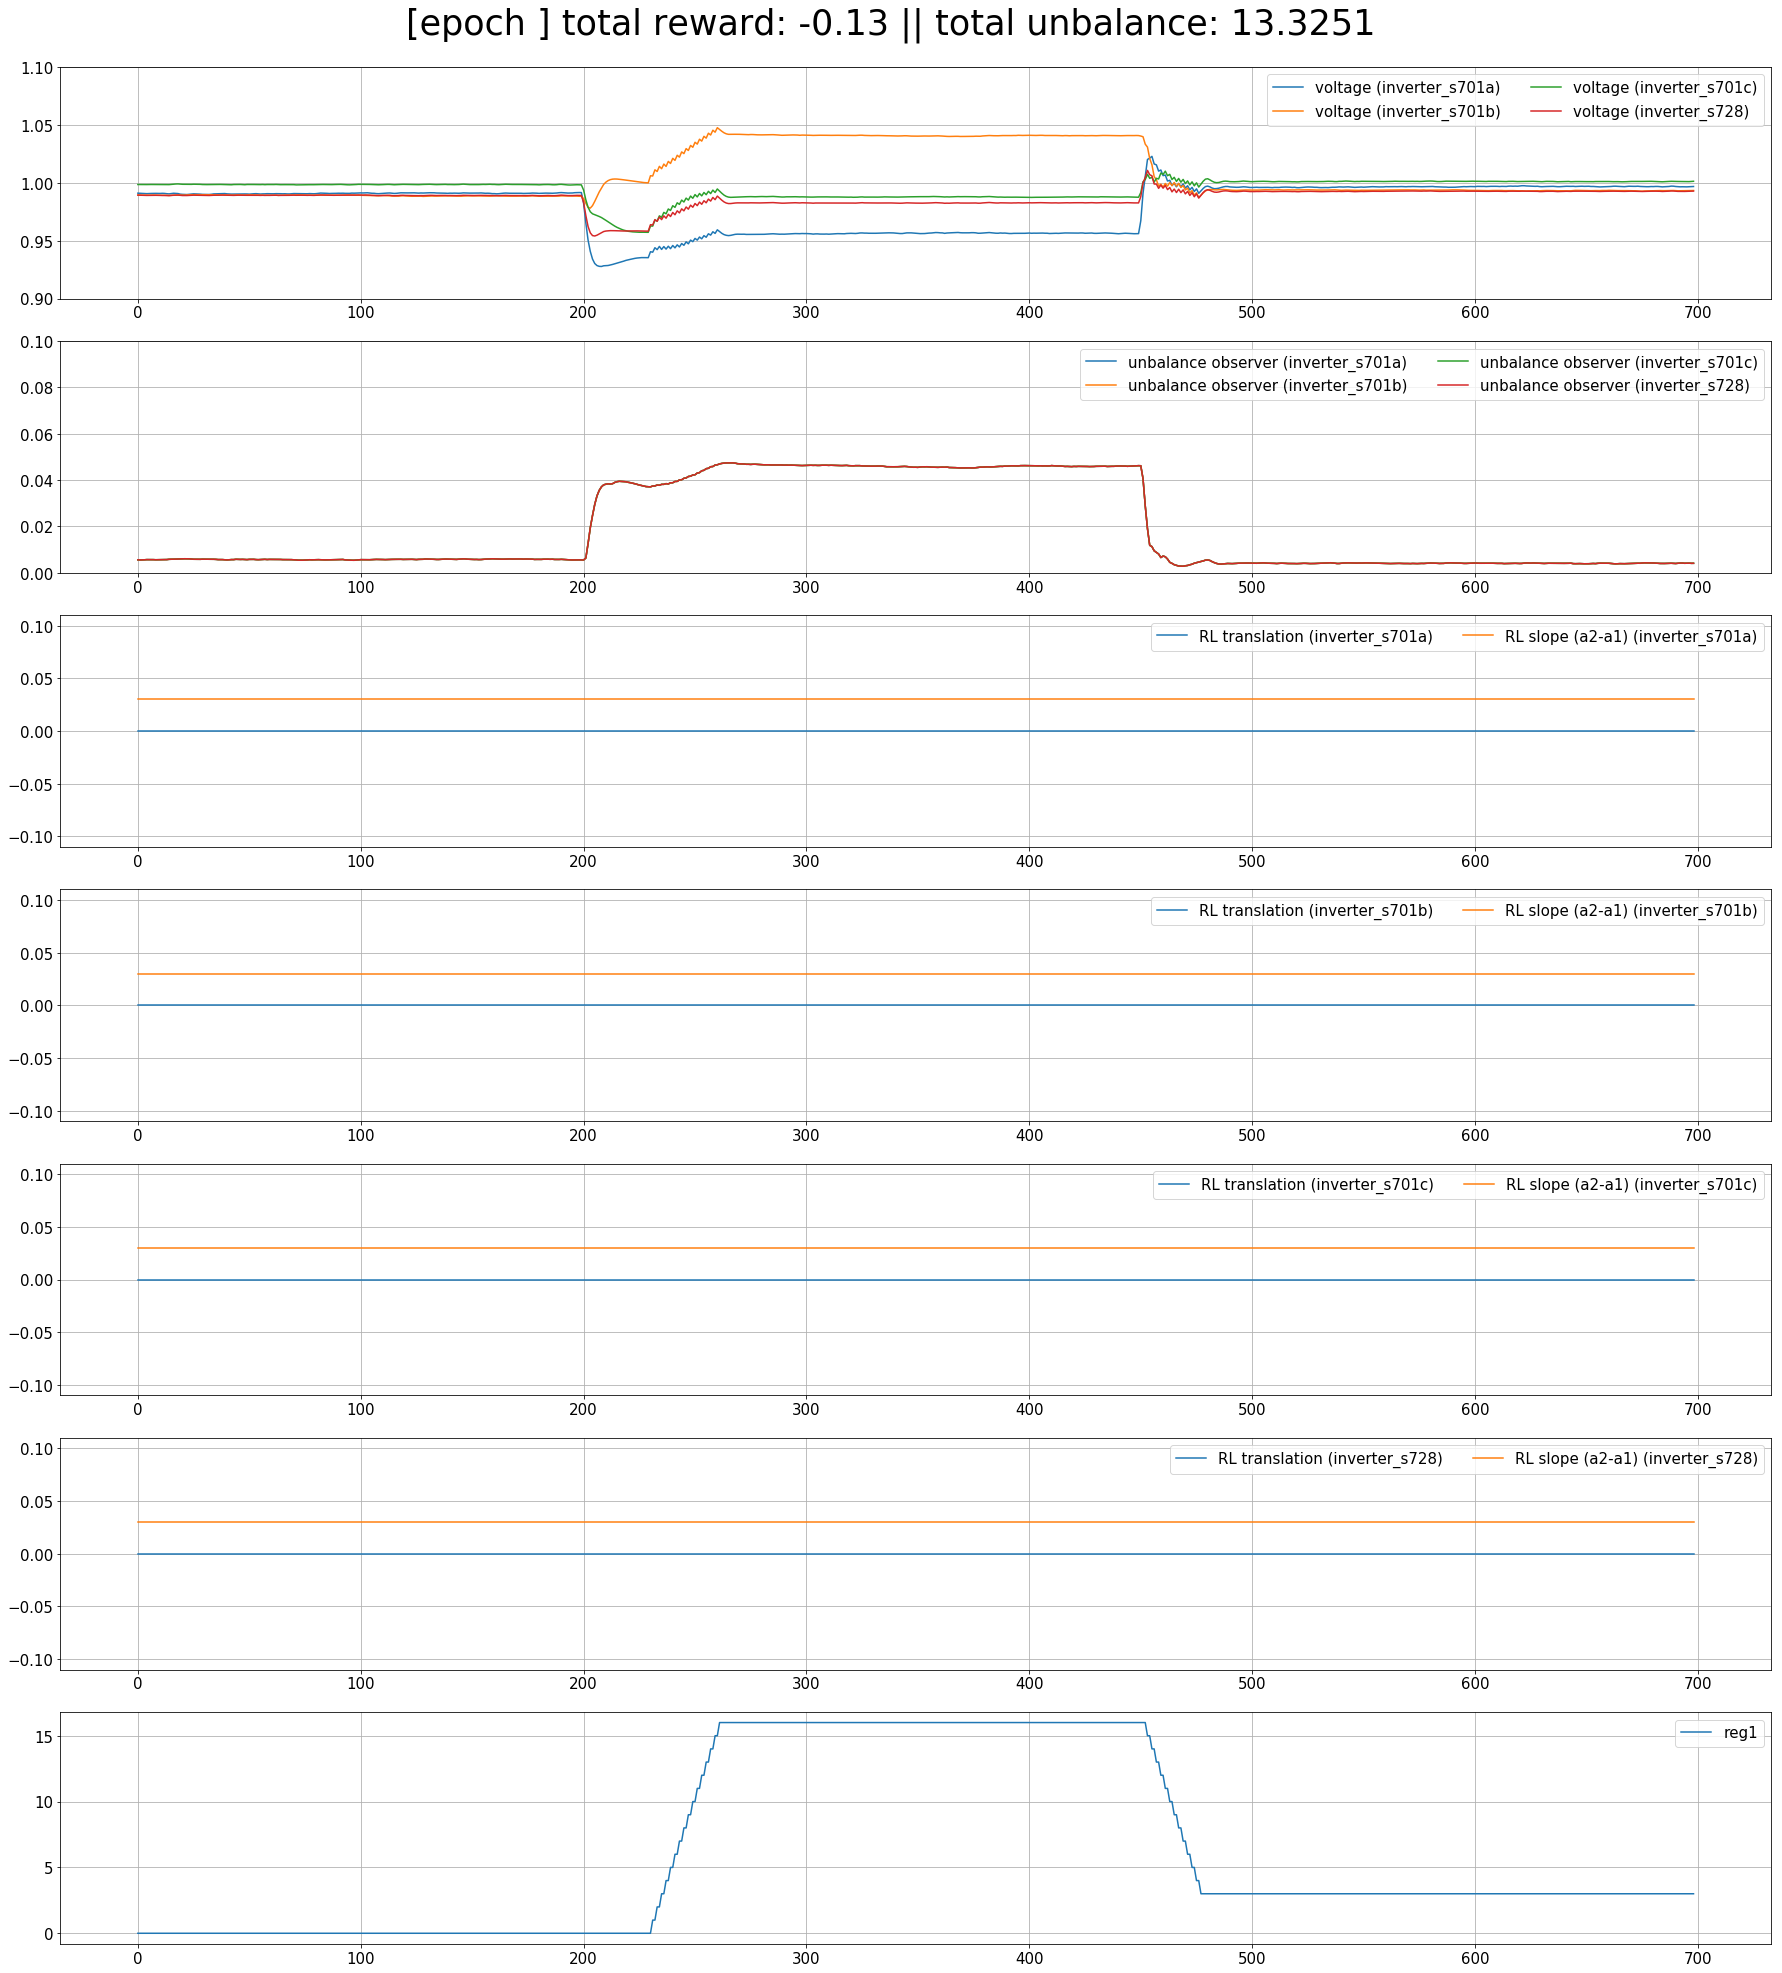

In [8]:
from pycigar.utils.output import plot_new

plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


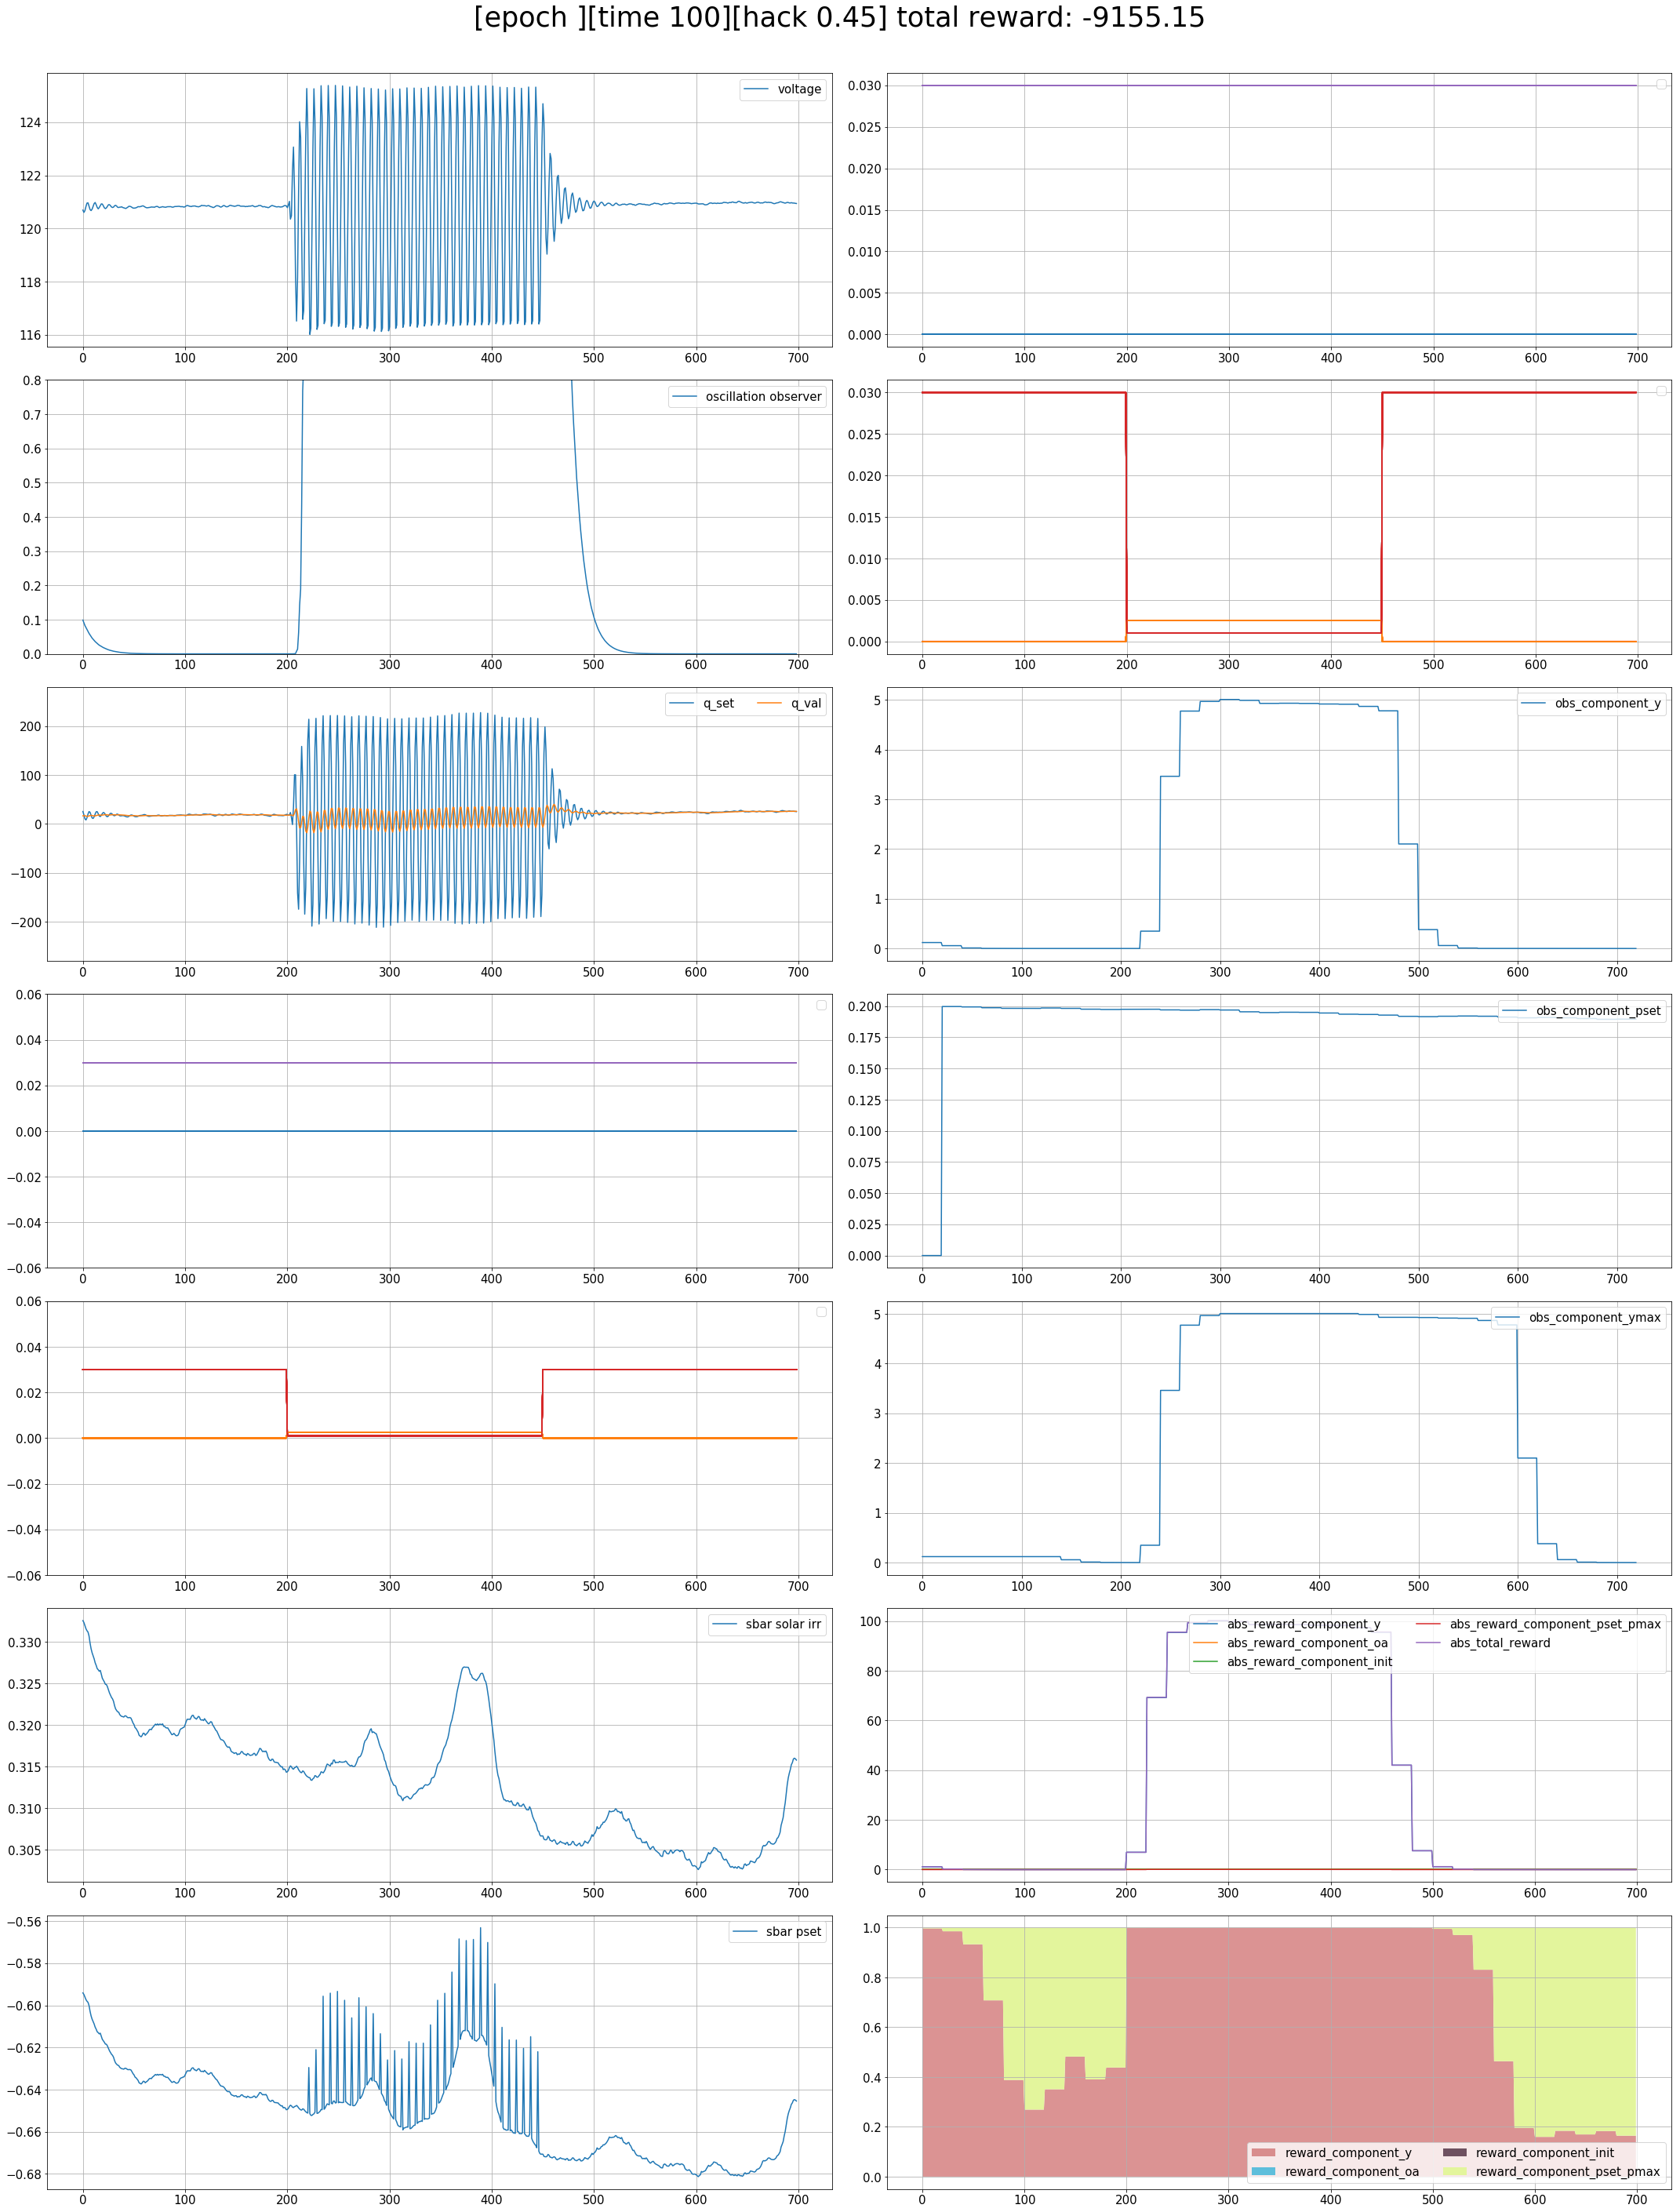

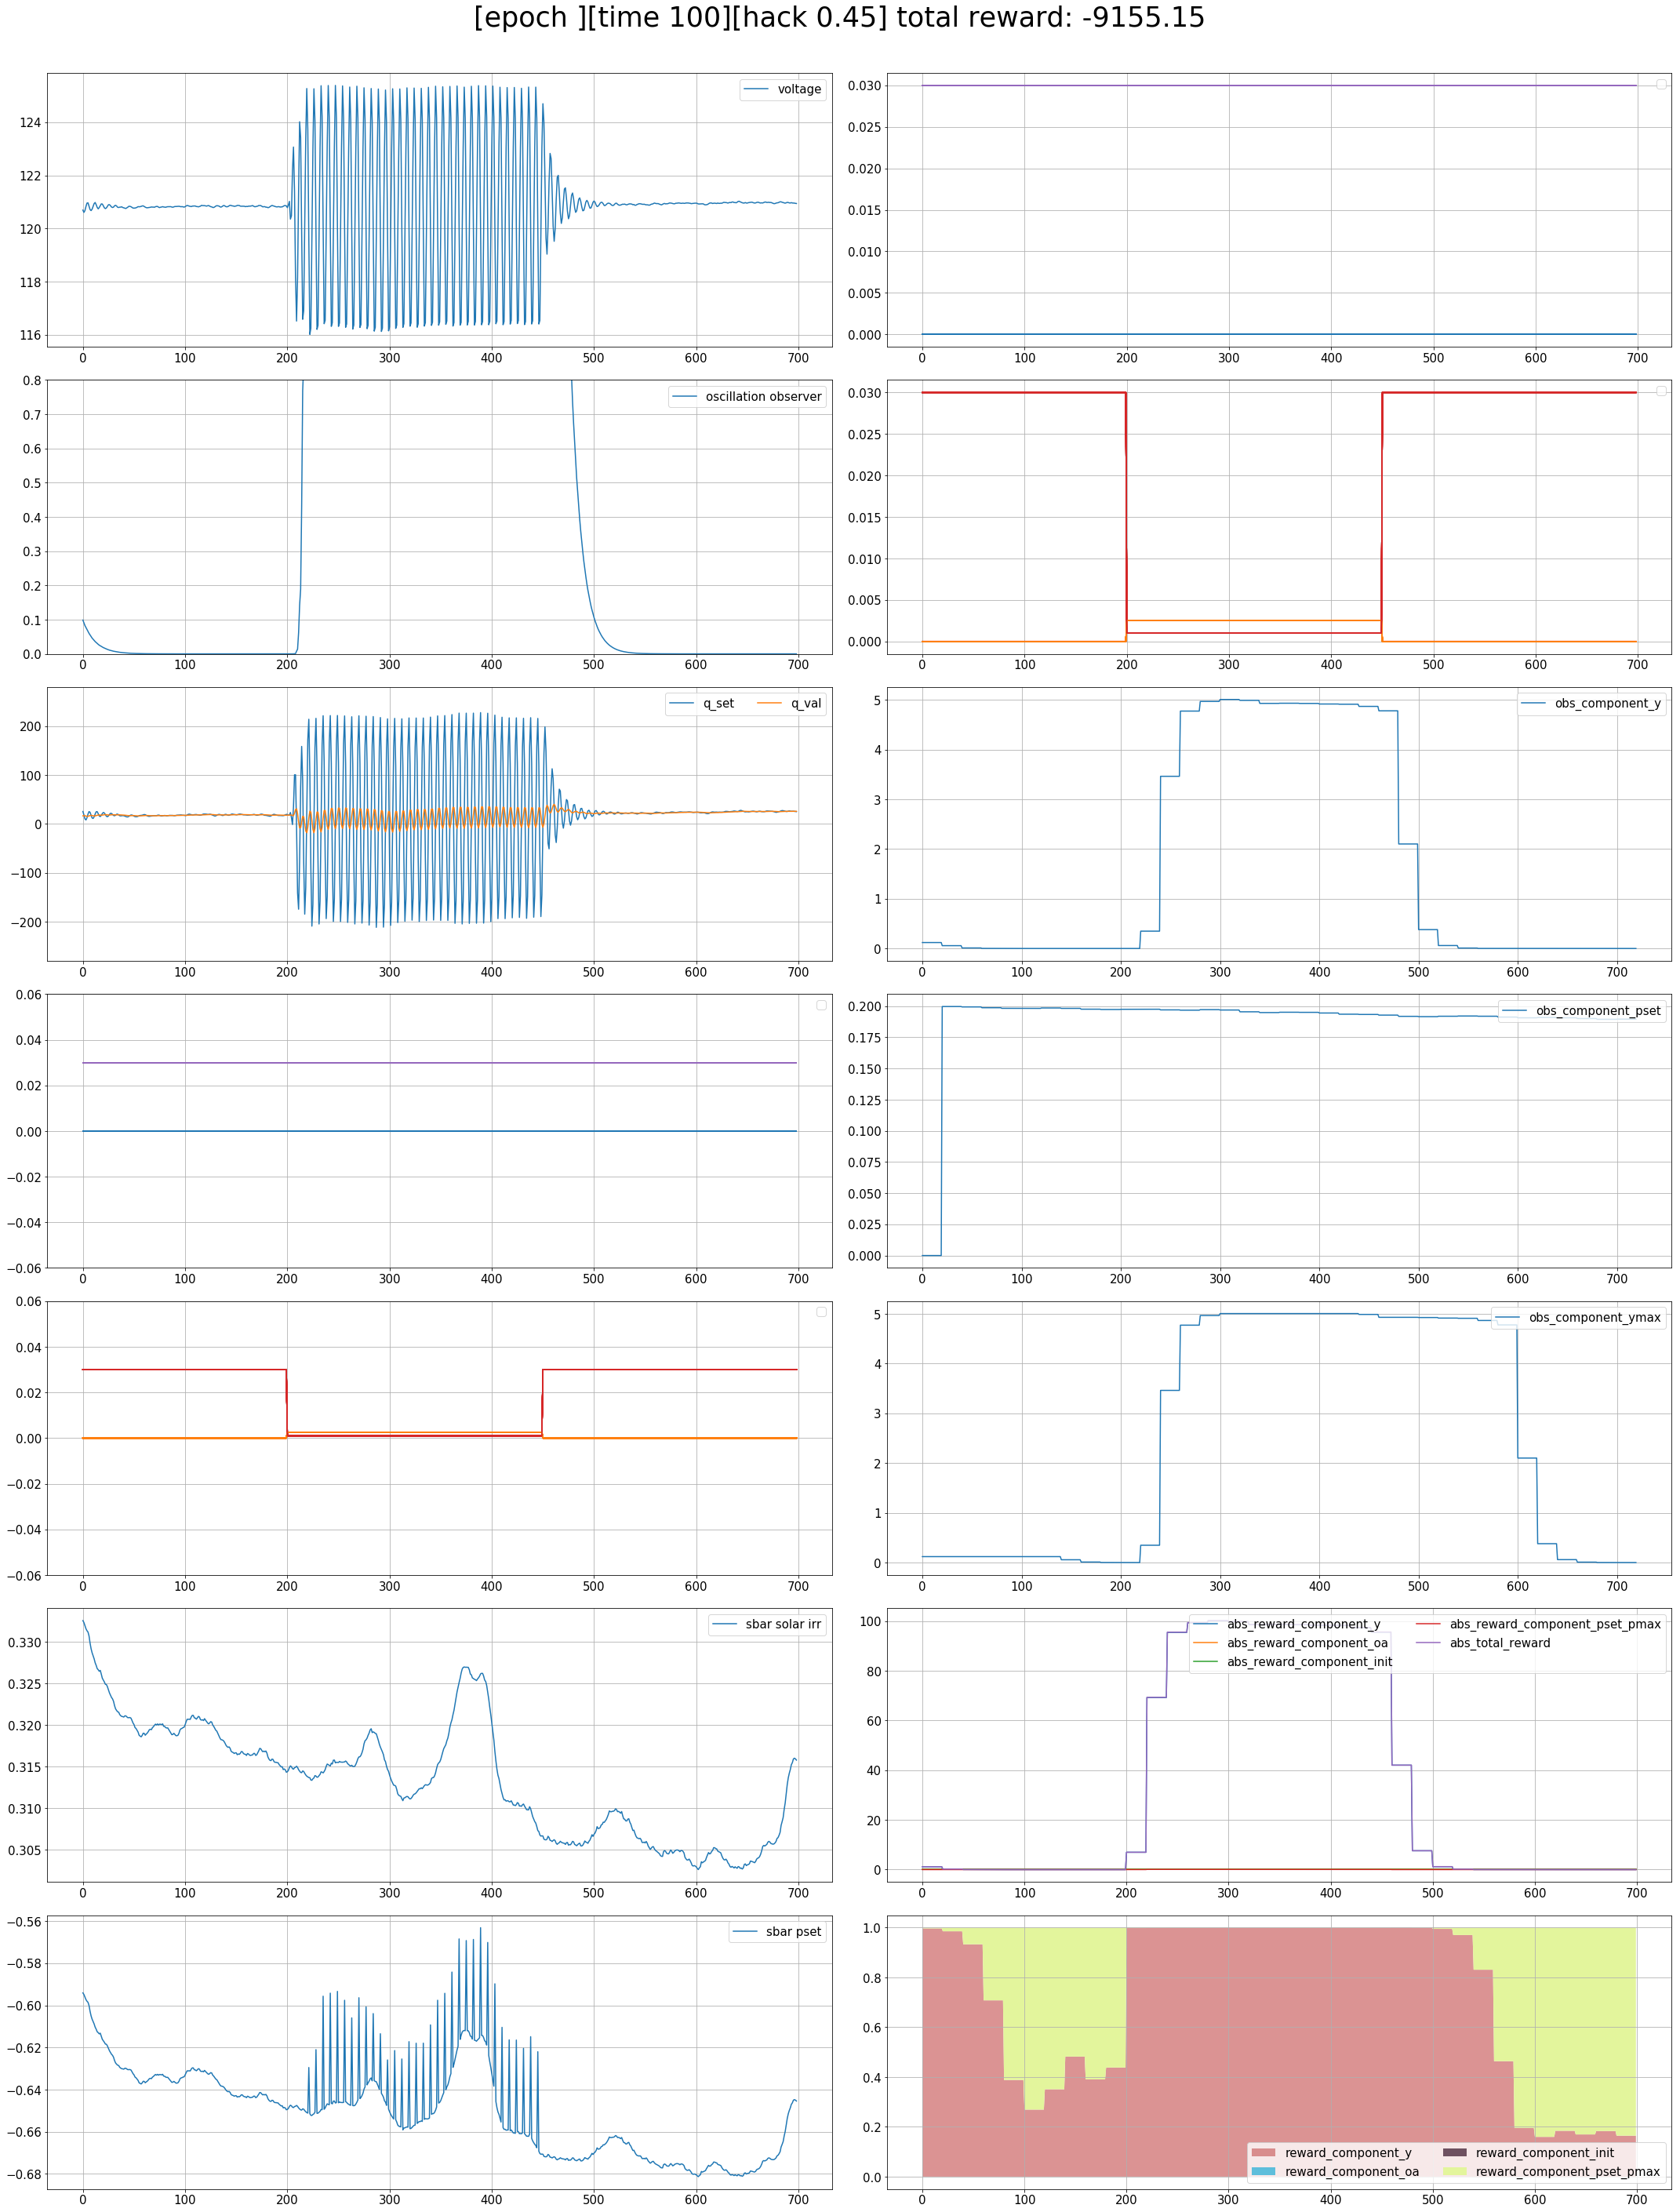

In [1]:
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/breakpoints_archived.csv'
start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=False, percentage_hack=0.45)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['simulation_config']['custom_configs']['solution_control_mode'] = 2
del sim_params['attack_randomization']
sim_params['scenario_config']['custom_configs']['load_scaling_factor'] = 2
sim_params['scenario_config']['custom_configs']['solar_scaling_factor'] = 2
sim_params['scenario_config']['custom_configs']['slack_bus_voltage'] = 1.04



from pycigar.envs import CentralControlPVInverterEnv
env = CentralControlPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step(10)

from pycigar.utils.logging import logger
Logger = logger()


from pycigar.utils.output import plot_new
plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=False)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


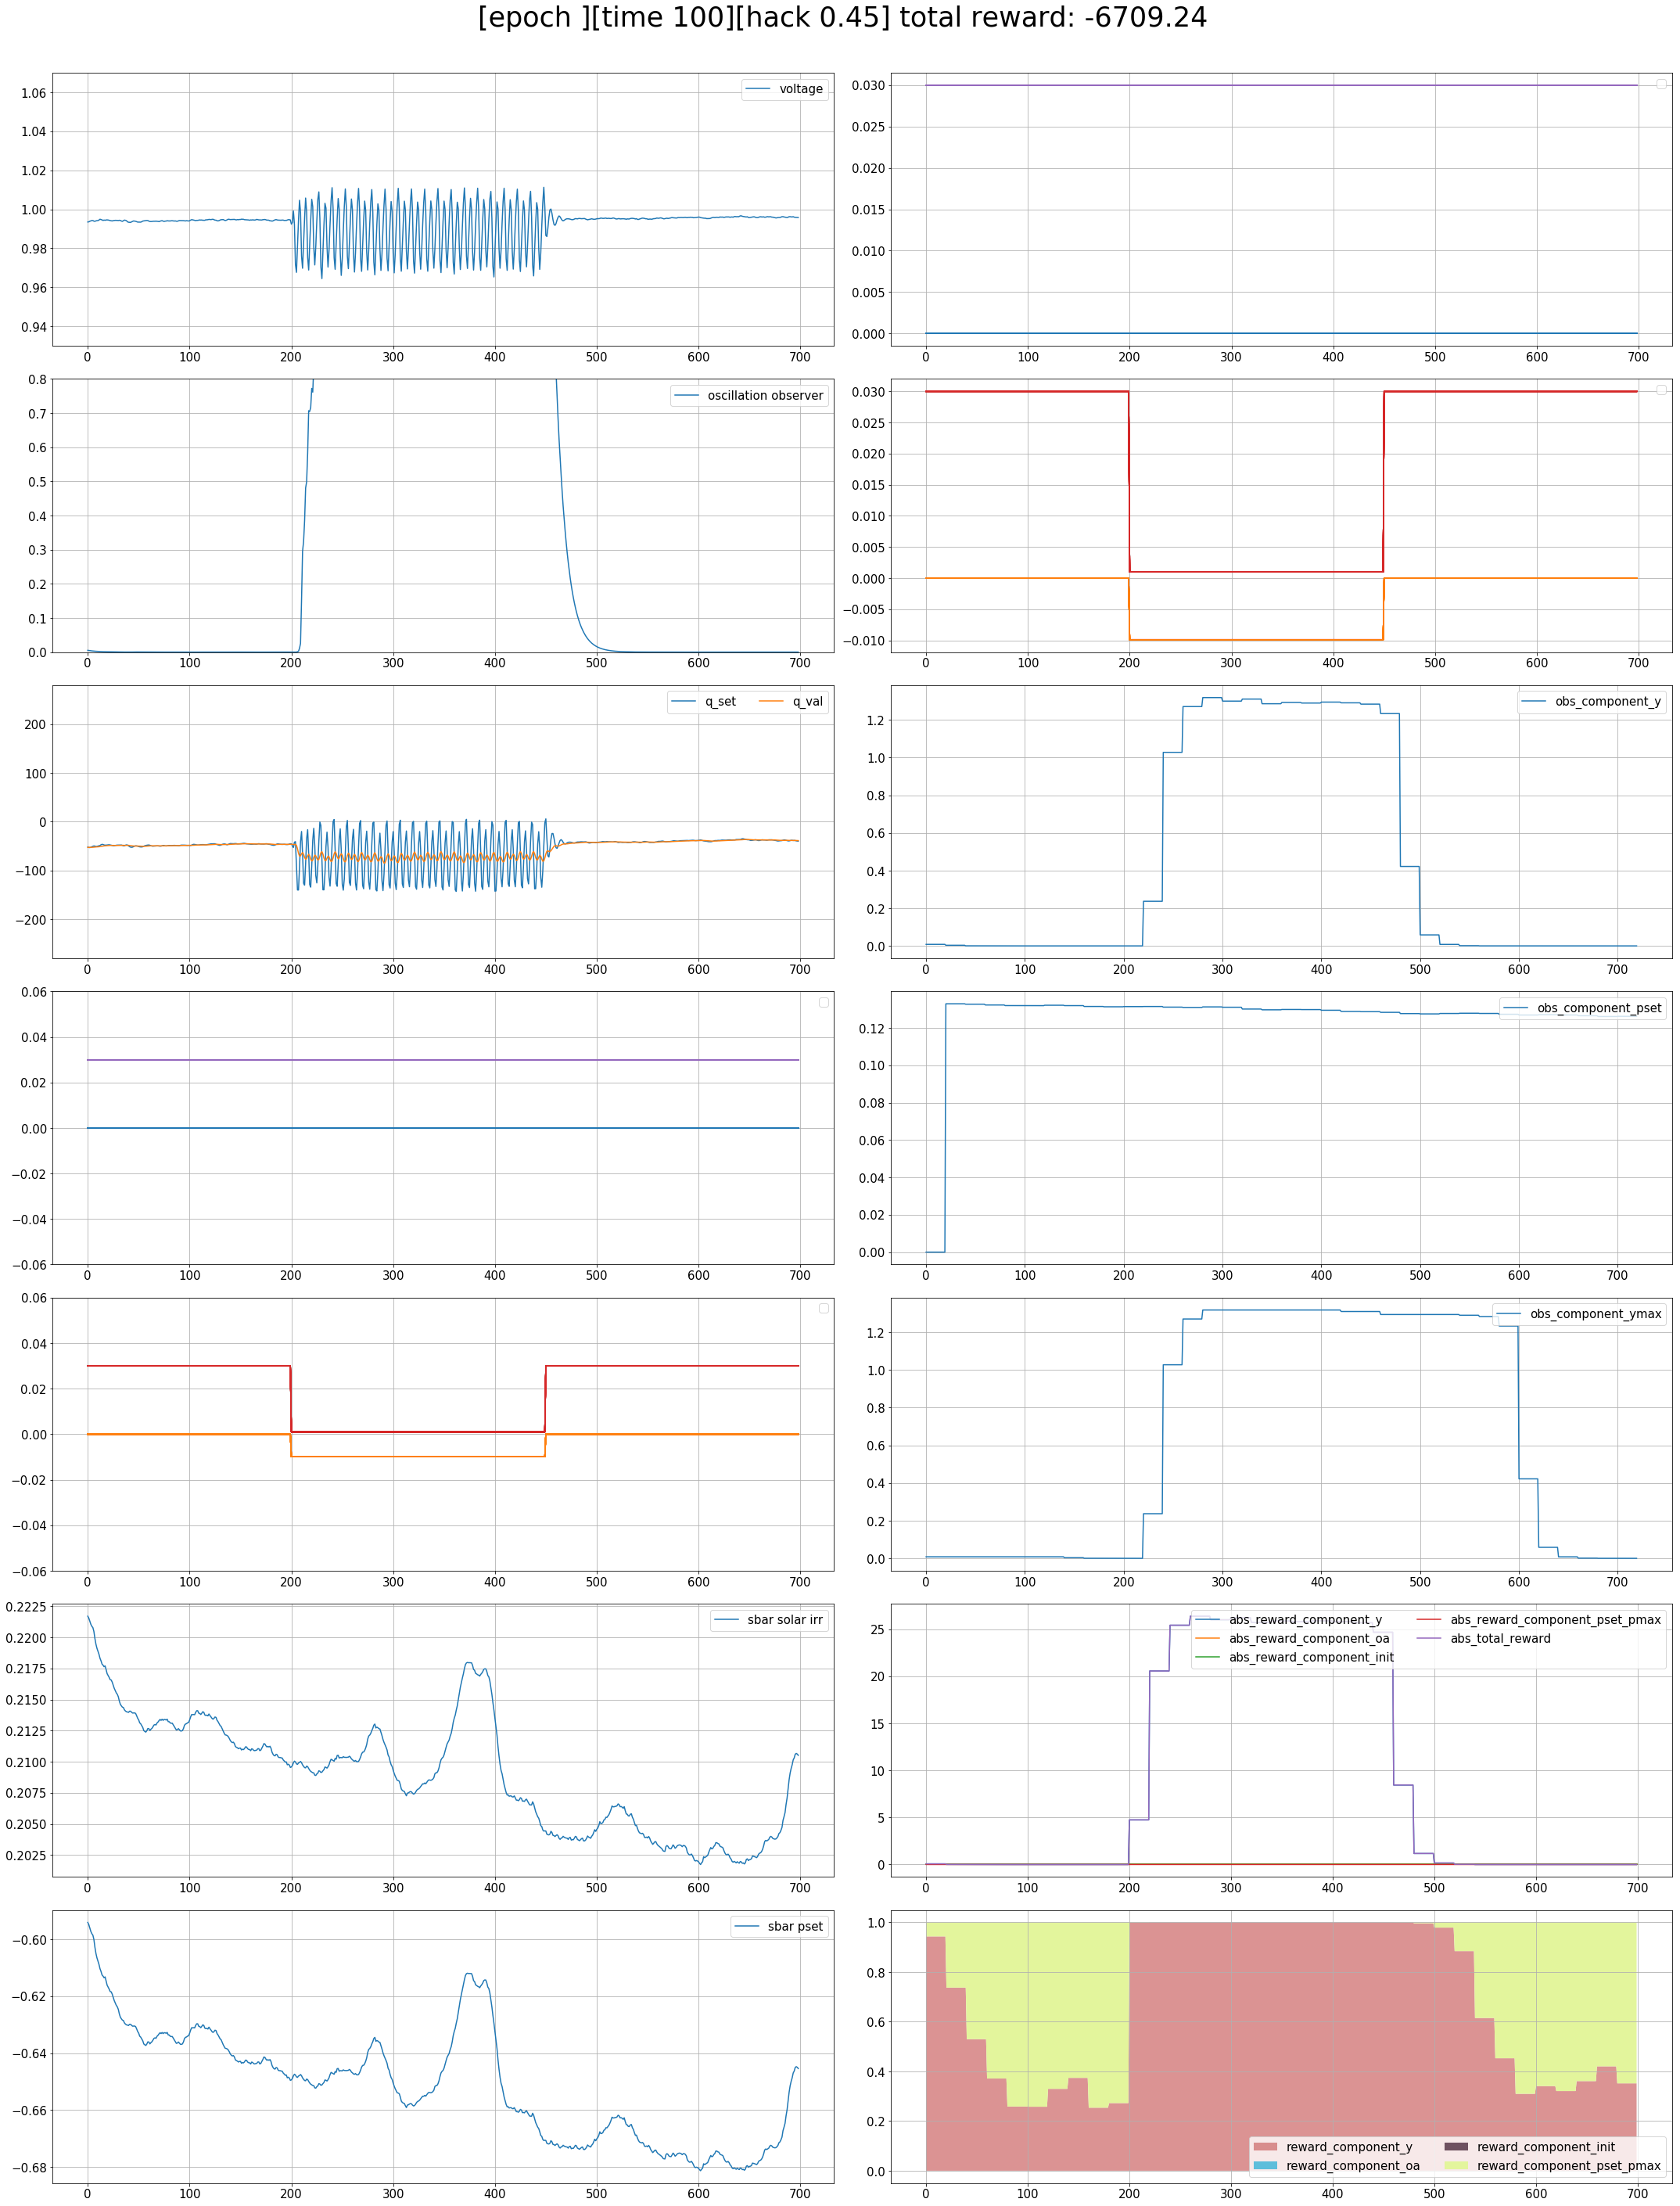

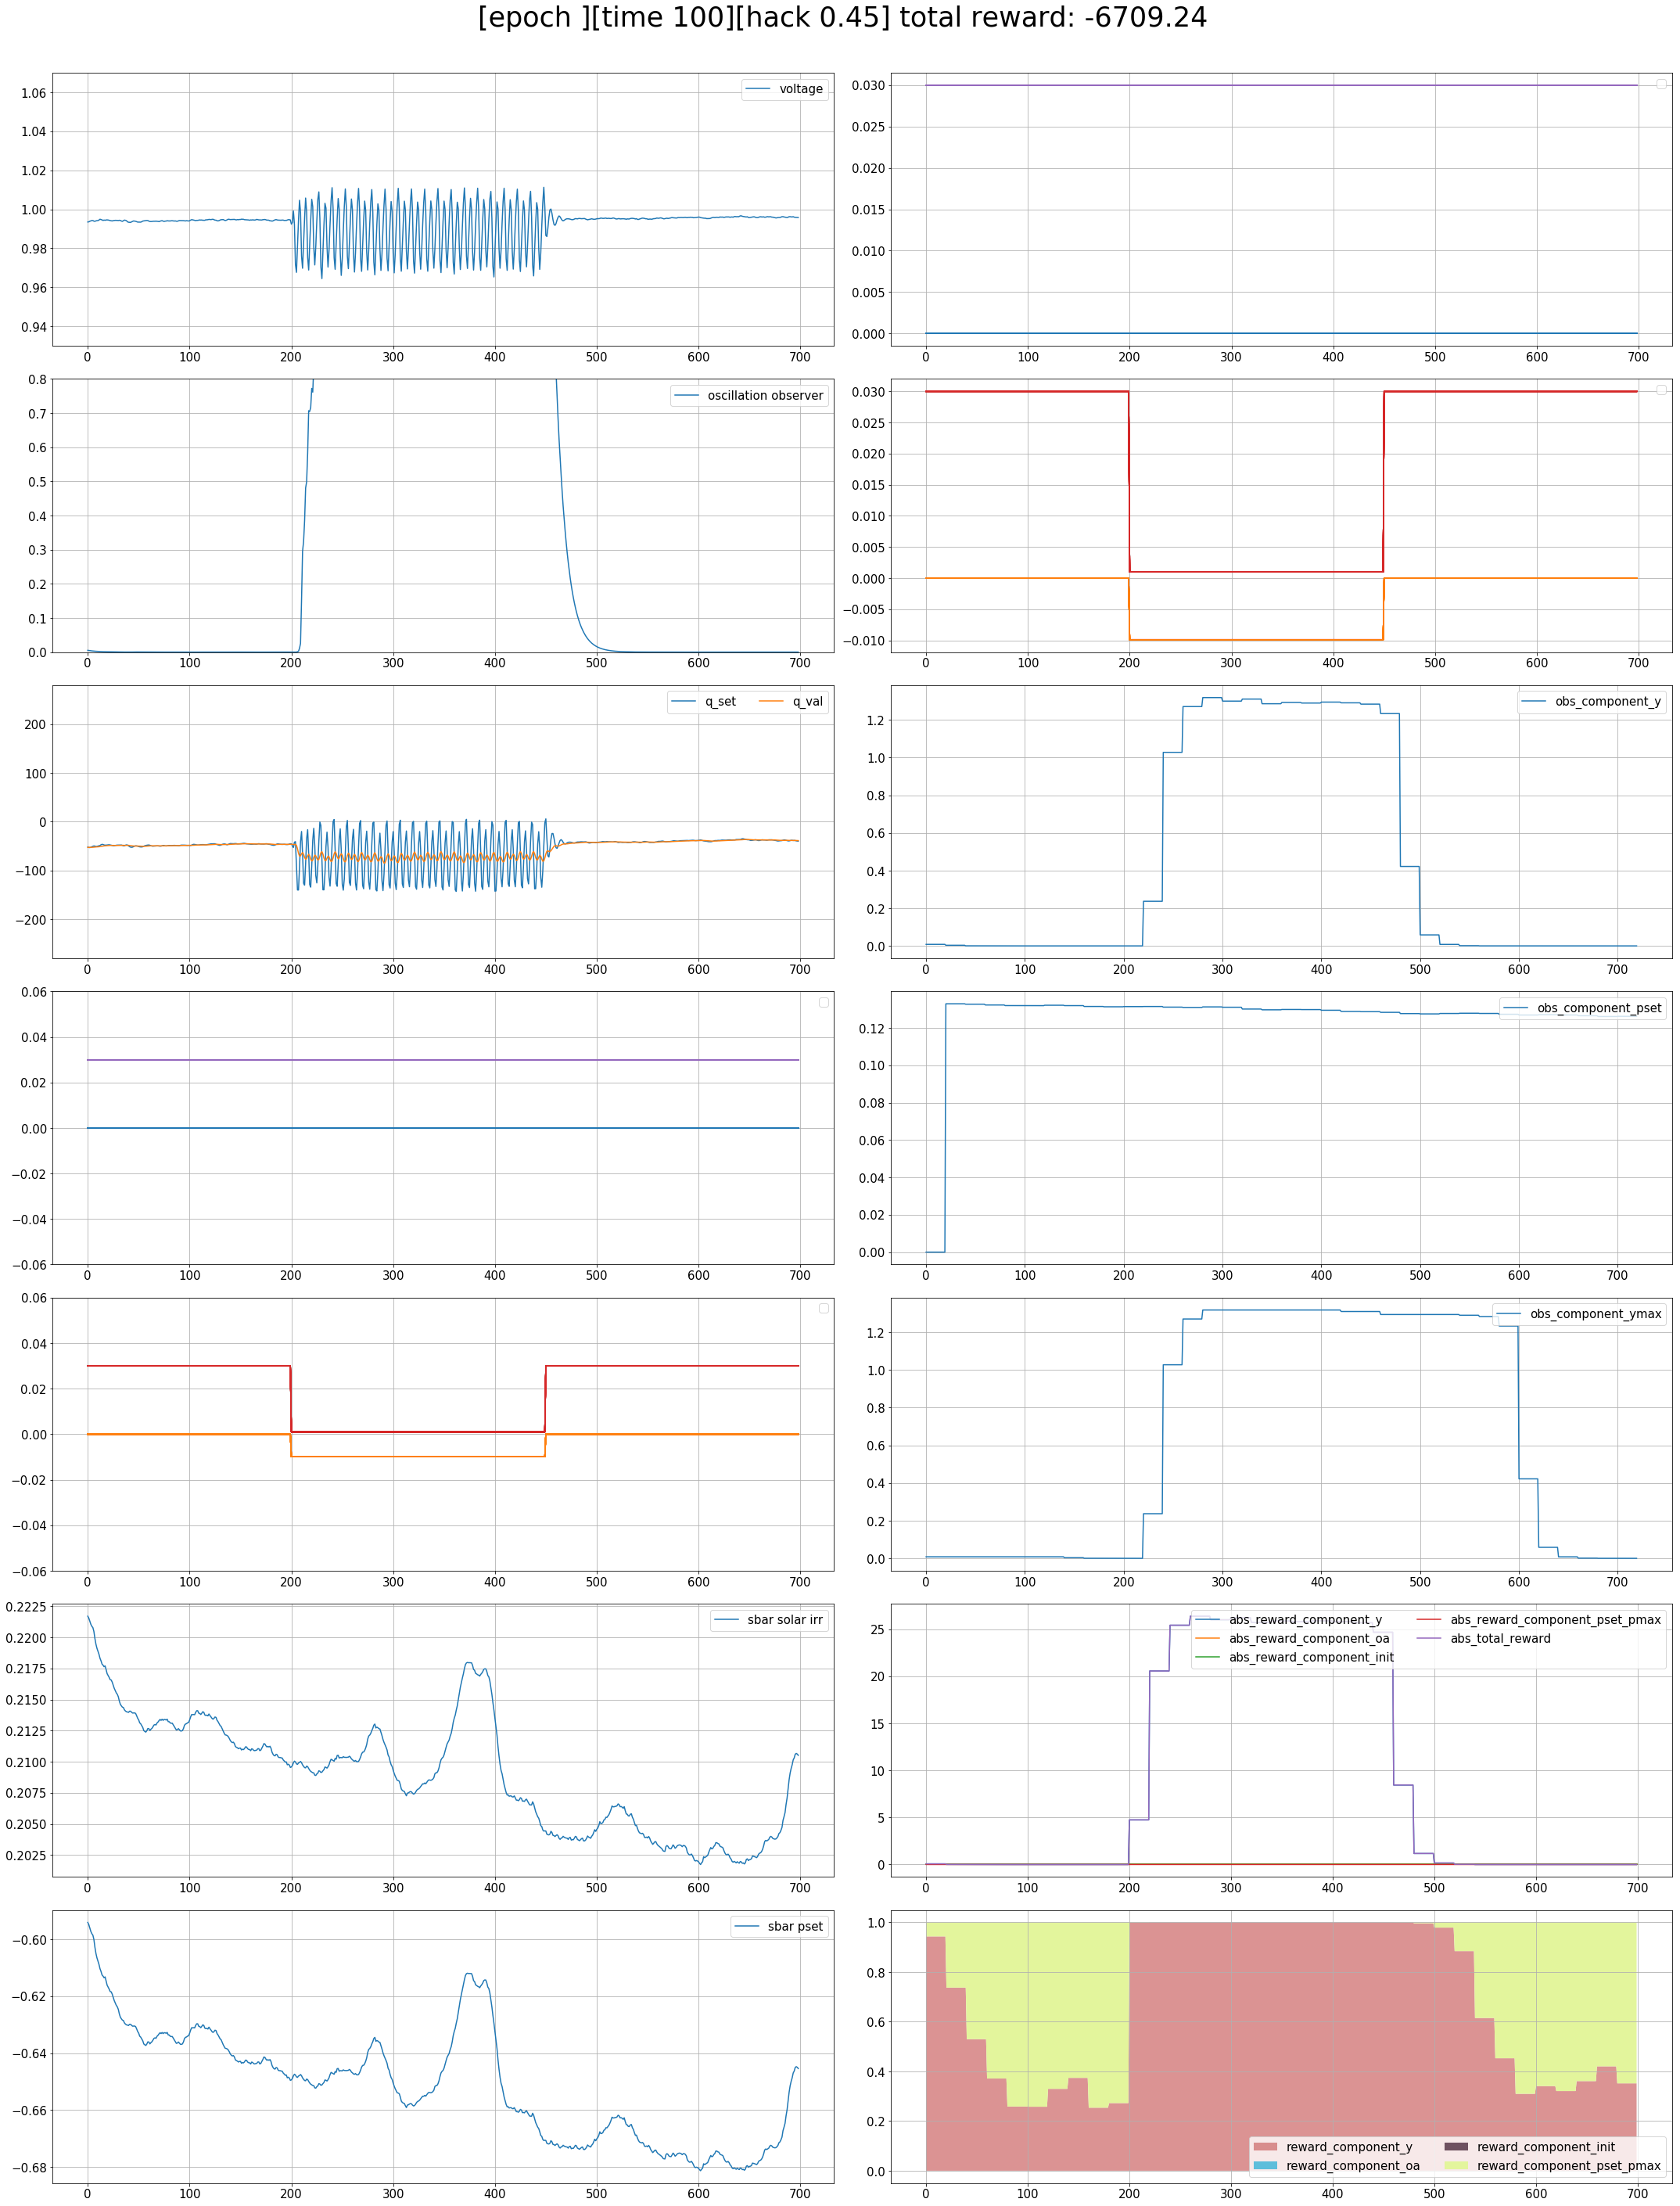

In [1]:
from pycigar.utils.input_parser import input_parser
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/breakpoints_archived.csv'

start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=False, percentage_hack=0.45)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['simulation_config']['custom_configs']['solution_control_mode'] = 2
del sim_params['attack_randomization']

sim_params['scenario_config']['custom_configs']['load_scaling_factor'] = 2
sim_params['scenario_config']['custom_configs']['solar_scaling_factor'] = 2
sim_params['scenario_config']['custom_configs']['slack_bus_voltage'] = 1.04
from pycigar.envs import CentralControlPVInverterEnv

env = CentralControlPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step(10)

from pycigar.utils.logging import logger
Logger = logger()


from pycigar.utils.output import plot_new
plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=False)

In [1]:
from gym.spaces import Tuple, Discrete, Box
from pycigar.utils.input_parser import input_parser
import pycigar
from pycigar.utils.registry import make_create_env
from pycigar.utils.input_parser import input_parser
from pycigar.utils.logging import logger
from pycigar.utils.output import plot_new

from ray.tune.registry import register_env

import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import numpy as np
import json
from pathlib import Path
from ray.rllib.models.catalog import ModelCatalog
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from pathlib import Path

from pycigar.utils.input_parser import input_parser
misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata_regulator_attack/breakpoints.csv'
#best_dir = Path('/home/toanngo/final_oscillation_results_discrete_eval_35_random_reg_no_max/final_results_discrete_eval_30_random_reg_no_max/main/run_train/run_train_0_T=2,M=50000,N=50,P=60,lr=0.0001_2020-09-16_22-45-03nu6061l6/best/reward_sum/policy_800')
#best_dir = Path('/home/toanngo/final_results_discrete_eval_30_current_u_30/final_results_discrete_eval_30_random_reg_no_max_30/main/run_train/run_train_0_T=2,M=50000,N=50,P=60,lr=0.0001_2020-09-18_10-46-38gbmacysj/eval/850/policy_850') # current u, step=30
#best_dir = Path('/home/toanngo/final_64_64_32_larger_last_action/final_results_discrete_eval_30_random_reg_no_max_64_64_32/main/run_train/run_train_1_T=2,M=50000,N=50,P=65,lr=0.0001_2020-09-19_00-22-44bwog3dhn/eval/1000/policy_1000') #current u, bigger last action penalty

#best_dir = Path('/home/toanngo/final_u_mean_p_65/final_results_discrete_eval_30_random_reg_no_max_64_64_32_new_u_p_65/main/run_train/run_train_2_T=2,M=50000,N=50,P=65,lr=0.0001_2020-09-21_17-50-12nxlnwtqb/best/reward_sum/policy_650') #u_mean reward 
#best_dir = Path('/home/toanngo/final_u_mean_p_70/final_results_discrete_eval_30_random_reg_no_max_64_64_32_new_u_p_70/main/run_train/run_train_0_T=2,M=50000,N=50,P=75,lr=0.0001_2020-09-22_08-51-0904bft2r_/best/reward_sum/policy_750')

best_dir = '/home/toanngo/Documents/GitHub/ceds-cigar-external/pycigar/docs/SAMPLE_RESULT_IEEE37_oscillation_policy'

start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=0.2)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
sim_params['env_config']['sim_per_step'] = 30
del sim_params['attack_randomization']


"""for node in sim_params['scenario_config']['nodes']:
    for d in node['devices']:
        d['adversary_controller'] = 'unbalanced_fixed_controller'"""

policy = tf.saved_model.load(str(best_dir))
infer = policy.signatures['serving_default']
action_dist, _ = ModelCatalog.get_action_dist(
    Tuple([Discrete(21)] * 3), config={}, dist_type=None, framework='tf')

from pycigar.envs.multiagent.multi_env_distributed_unb import UnbMultiEnv

env = UnbMultiEnv(sim_params=sim_params)
obs = env.reset()
done = False
init_action = {k: env.INIT_ACTION[k] for k in env.k.device.get_rl_device_ids()}
init_action_rl = {k: [10, 10, 10] for k in env.k.device.get_rl_device_ids()}
def encode_action(act):
    encode_act = {}
    for k in act:
        old_a_encoded = np.zeros(21*3)
        offsets = np.cumsum([0, *[a.n for a in Tuple([Discrete(21)] * 3)][:-1]])
        for action, offset in zip(act[k], offsets):
            old_a_encoded[offset + action] = 1
        encode_act[k] = old_a_encoded
    return encode_act

def decode_action(rl_act):
    decode_act = {}
    for k in rl_act:
        if k.endswith('a'):
            translation = rl_act[k][0]
        elif k.endswith('b'):
            translation = rl_act[k][1]
        elif k.endswith('c'):
            translation = rl_act[k][2]
        else:
            translation = int(21 / 2)

        decode_act[k]  = init_action[k] - 0.1 + 0.01 * translation
    return decode_act

last_act = init_action_rl
while not done:
    new_act = {}
    encode_act = encode_action(last_act)
    for k in env.k.device.get_rl_device_ids():
        obs_array = np.array([obs[k]['y_max'], obs[k]['y'], obs[k]['u'], obs[k]['sbar_solar_irr'], *encode_act[k], *obs[k]['voltage']]).tolist()
        out = infer(
            prev_reward=tf.constant([0.], tf.float32),
            observations=tf.constant([obs_array], tf.float32),
            is_training=tf.constant(False),
            seq_lens=tf.constant([0], tf.int32),
            prev_action=tf.constant([0], tf.int64)
        )['action_dist_inputs'].numpy()
        dist = action_dist(inputs=out, model=None)
        #act = dist.deterministic_sample().numpy().batches
        act = np.array(dist.deterministic_sample()).flatten()
        new_act[k] = act

    act = decode_action(new_act)
    last_act = new_act
    obs, r, done, _ = env.step(act)
    done = done['__all__']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


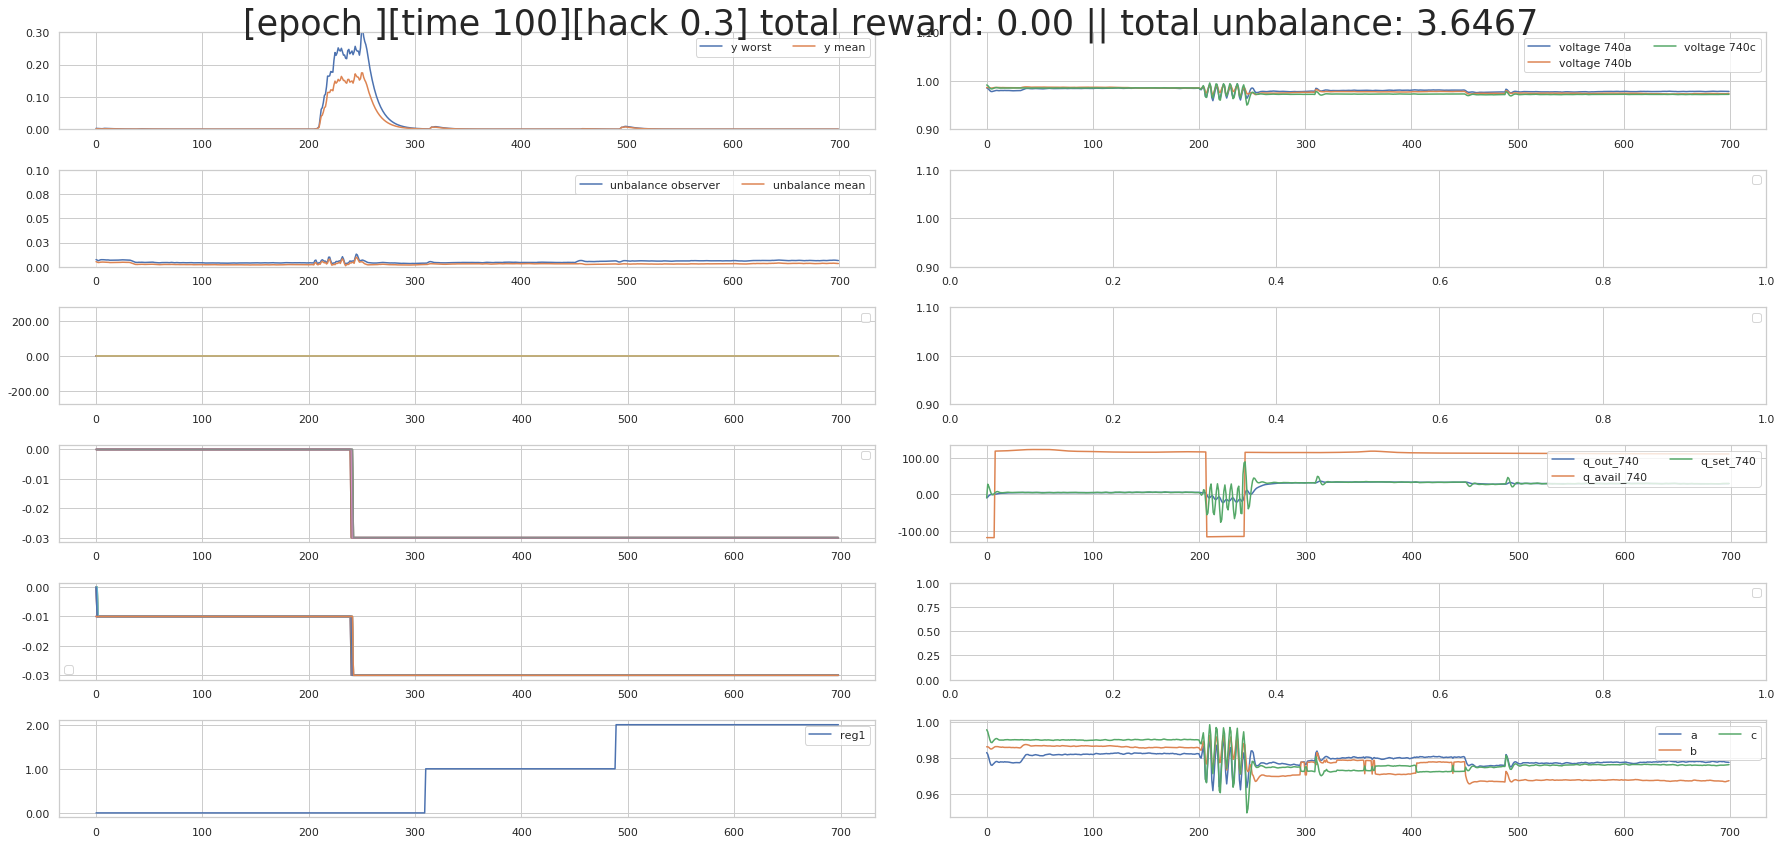

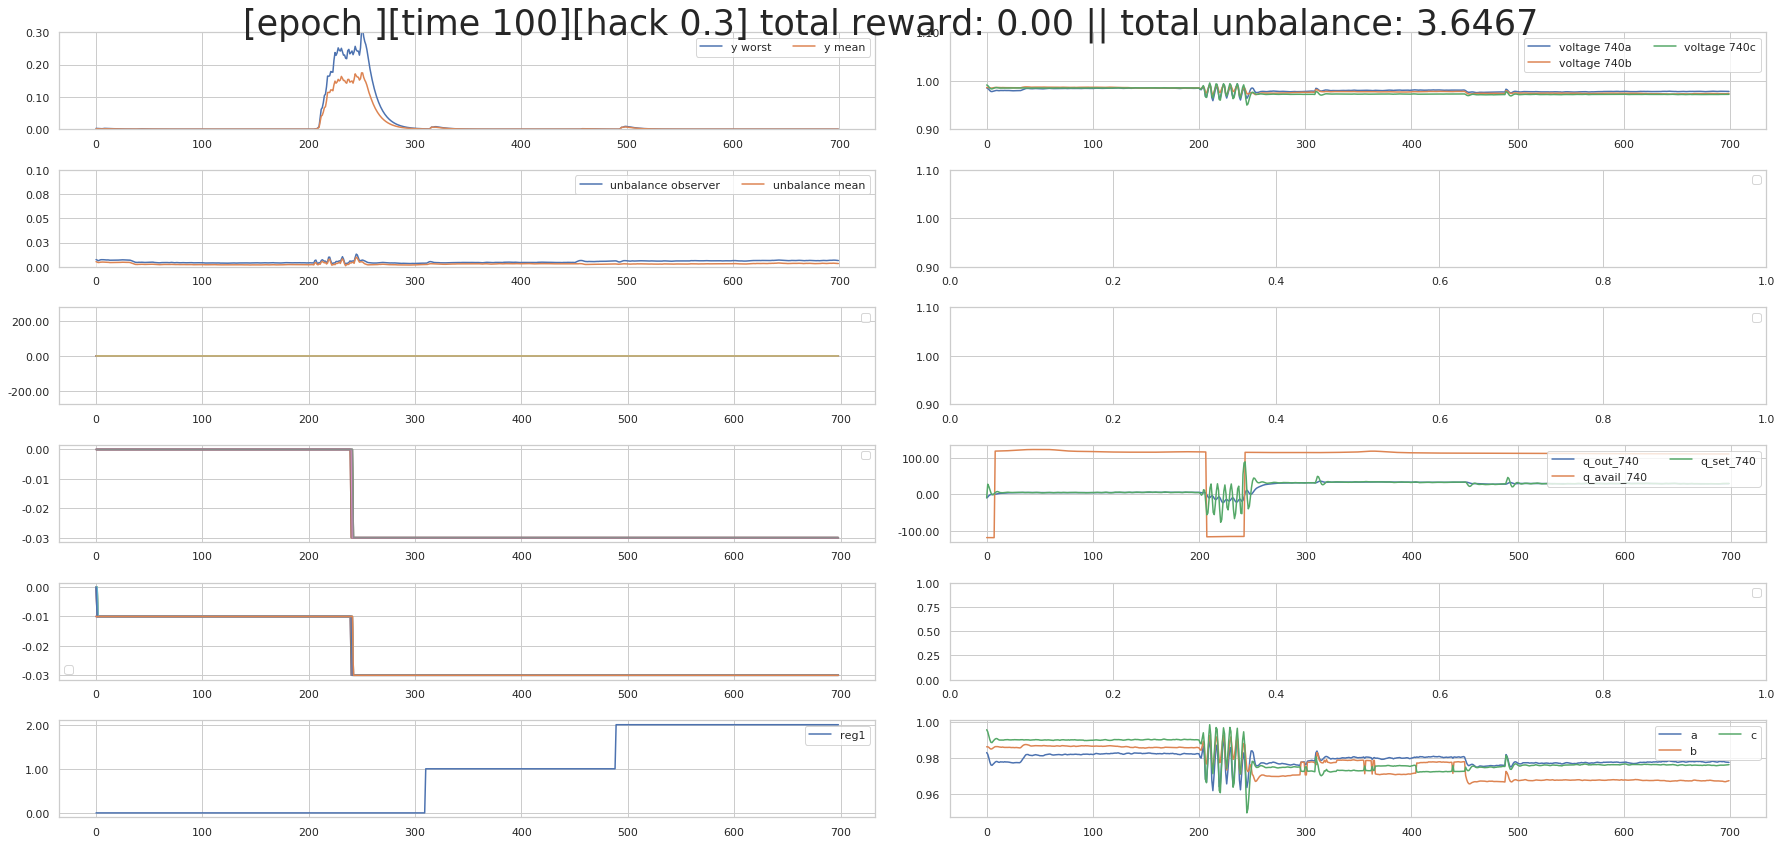

In [2]:
from pycigar.utils.logging import logger
Logger = logger()


from pycigar.utils.output import plot_new
plot_new(Logger.log_dict, Logger.custom_metrics, unbalance=True)

In [3]:
from pycigar.utils.logging import logger
def get_translation_and_slope(a_val, init_a):
    points = np.array(a_val)
    slope = points[:, 1] - points[:, 0]
    translation = points[:, 2] - init_a[2]
    return translation, slope

log_dict = logger().log_dict
custom_metrics = logger().custom_metrics

ta_all = []
tb_all = []
tc_all = []

qouta_all = []
qoutb_all = []
qoutc_all = []
for k, v in enumerate(log_dict):
    if v.startswith('inverter_') and v.endswith('a'):
        ta, _ = get_translation_and_slope(log_dict[v]['control_setting'], custom_metrics['init_control_settings'][v])
        ta_all.append(ta)
        qouta_all.append(log_dict[v]['q_out'])
    if v.startswith('inverter_') and v.endswith('b'):
        tb, _ = get_translation_and_slope(log_dict[v]['control_setting'], custom_metrics['init_control_settings'][v])
        tb_all.append(tb)
        qoutb_all.append(log_dict[v]['q_out'])
    if v.startswith('inverter_') and v.endswith('c'):
        tc, _ = get_translation_and_slope(log_dict[v]['control_setting'], custom_metrics['init_control_settings'][v])
        tc_all.append(tc)
        qoutc_all.append(log_dict[v]['q_out'])

ta_all = np.array(ta_all).T
tb_all = np.array(tb_all).T
tc_all = np.array(tc_all).T

qouta_all = np.array(qouta_all).T
qoutb_all = np.array(qoutb_all).T
qoutc_all = np.array(qoutc_all).T
qouta_mean = np.mean(qouta_all, axis=1)
qoutb_mean = np.mean(qoutb_all, axis=1)
qoutc_mean = np.mean(qoutc_all, axis=1)
qouta_std = np.std(qouta_all, axis=1)
qoutb_std = np.std(qoutb_all, axis=1)
qoutc_std = np.std(qoutc_all, axis=1)

va = log_dict['s701a']['voltage']
vb = log_dict['s701b']['voltage']
vc = log_dict['s701c']['voltage']

u_worst = log_dict['u_metrics']['u_worst'][1:]
u_mean = log_dict['u_metrics']['u_mean'][1:]
u_std = log_dict['u_metrics']['u_std'][1:]
reg = log_dict['reg1']['tap_number']
import pandas as pd
df = {'va': va, 'vb': vb, 'vc': vc, 'u_worst': u_worst, 'u_mean': u_mean, 'u_std': u_std, 'reg': reg}
for i in range(ta_all.shape[1]):
    df['ta_' + str(i)] = ta_all[:, i]
for i in range(tb_all.shape[1]):
    df['tb_' + str(i)] = tb_all[:, i]
for i in range(tc_all.shape[1]):
    df['tc_' + str(i)] = tc_all[:, i]

df['qouta_mean'] = qouta_mean
df['qoutb_mean'] = qoutb_mean
df['qoutc_mean'] = qoutc_mean
df['qouta_std'] = qouta_std
df['qoutb_std'] = qoutb_std
df['qoutc_std'] = qoutc_std

df['qouta_total'] = np.sum(qouta_all, axis=1)
df['qoutb_total'] = np.sum(qoutb_all, axis=1)
df['qoutc_total'] = np.sum(qoutc_all, axis=1)

df = pd.DataFrame(df)
#df.to_csv('baseline_h30_t100_test.csv', sep=',')
#df.to_csv('discrete_h30_t100_test_distributed.csv', sep=',')
#df.to_csv('discrete_h40_t100_test_distributed.csv', sep=',')
#df.to_csv('discrete_h40_t11000_test_distributed.csv', sep=',')

In [11]:
ta_all = np.array(ta_all).T
tb_all = np.array(tb_all).T
tc_all = np.array(tc_all).T

qouta_all = np.array(qouta_all).T
qoutb_all = np.array(qoutb_all).T
qoutc_all = np.array(qoutc_all).T

In [11]:
np.std(qouta_all, axis=1).shape

(699,)

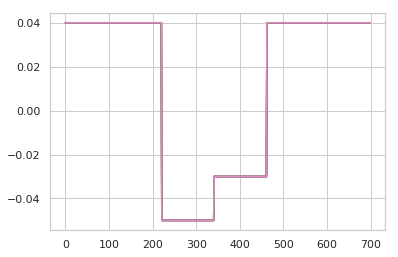

In [5]:
for i in range(7):
    plt.plot(df['tb'+str(i)])
plt.show()

In [13]:
df.columns

Index(['va', 'vb', 'vc', 'u_worst', 'u_mean', 'u_std', 'reg', 'ta0', 'ta1',
       'ta2', 'ta3', 'ta4', 'ta5', 'ta6', 'ta7', 'ta8', 'tb0', 'tb1', 'tb2',
       'tb3', 'tb4', 'tb5', 'tb6', 'tb7', 'tc0', 'tc1', 'tc2', 'tc3', 'tc4',
       'tc5', 'tc6', 'tc7', 'tc8', 'tc9', 'tc10', 'tc11', 'qouta_mean',
       'qoutb_mean', 'qoutc_mean', 'qouta_std', 'qoutb_std', 'qoutc_std'],
      dtype='object')

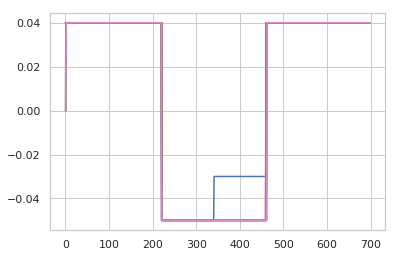

In [7]:
for i in range(7):
    plt.plot(tb_all[:, i])
plt.show()

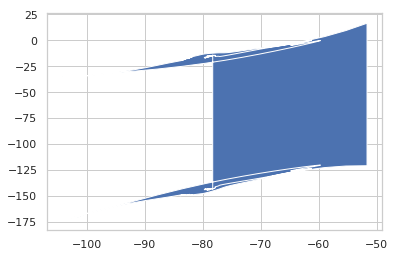

In [7]:
mean = df['qouta_mean']
std = df['qouta_std']
plt.plot(df['qouta_mean'].tolist())
plt.fill_between(mean, mean-std, mean+std)

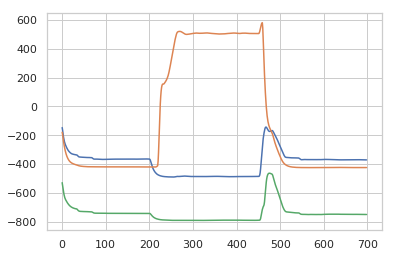

In [4]:
plt.plot(df['qouta_total'].tolist())
plt.plot(df['qoutb_total'].tolist())
plt.plot(df['qoutc_total'].tolist())
plt.show()

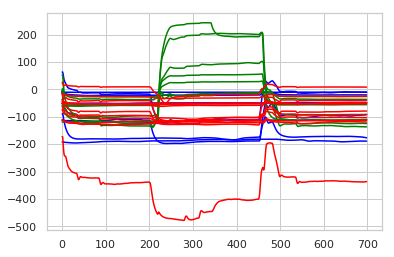

In [6]:
for i in range(qouta_all.shape[1]):
    plt.plot(qouta_all[:, i], color='blue')
for i in range(qoutb_all.shape[1]):
    plt.plot(qoutb_all[:, i], color='green')
for i in range(qoutc_all.shape[1]):
    plt.plot(qoutc_all[:, i], color='red')
plt.show()


In [1]:
from pycigar.utils.input_parser import input_parser

misc_inputs = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/misc_inputs.csv'
dss = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/ieee37.dss'
load_solar = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/load_solar_data.csv'
breakpoints = '/home/toanngo/Documents/GitHub/cigar-document/ceds-cigar/pycigar/data/ieee37busdata/breakpoints.csv'

start = 100
sim_params = input_parser(misc_inputs, dss, load_solar, breakpoints, benchmark=True, vectorized_mode=True, percentage_hack=0.45)
sim_params['scenario_config']['start_end_time'] = [start, start + 750]
del sim_params['attack_randomization']
for node in sim_params['scenario_config']['nodes']:
    node['devices'][0]['adversary_controller'] = 'adaptive_fixed_controller'

    

from pycigar.envs import MultiAttackCentralControlPhaseSpecificPVInverterEnv

env = MultiAttackCentralControlPhaseSpecificPVInverterEnv(sim_params=sim_params)
env.reset()
done = False
while not done:
    _, r, done, _ = env.step([10, 10, 10])


In [2]:
from pycigar.utils.logging import logger 
log_dict = logger().log_dict

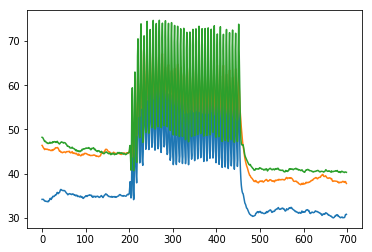

In [3]:
import numpy as np
import matplotlib.pyplot as plt
l1_current = np.array(log_dict['current']['l1'])

plt.plot(l1_current[:,0])
plt.plot(l1_current[:,1])
plt.plot(l1_current[:,2])

In [4]:
import pickle

with open('current_oscillation_scaling_1.pickle', 'wb') as handle:
    pickle.dump(log_dict['current'], handle, protocol=pickle.HIGHEST_PROTOCOL)